# Build MI Network from types and samples

## Libs

In [1]:
import os
import scanpy as sc
from itertools import compress
import pandas as pd
backup_dir = '/root/datos/maestria/netopaas/luca_explore/surgeries/'

## Check datas

Check for which dests we have combined embeds, and just the query objects.
We have different stages of annotation as backups.
- *filter*: Only the quality control filters
- *query*: The dataset reduced to the genes to be queried
- *combined*: The dataset combined with the atlas for label propagation
- *latent*: The dataset reduced by an autoencoder to the relevant dimension

The combined is the only one with annotations

In [2]:
backup_h5ds = os.listdir(backup_dir)
latent_h5ds = list(compress(backup_h5ds,['latent' in h5d for h5d in backup_h5ds]))
query_h5ds = list(compress(backup_h5ds,['query' in h5d for h5d in backup_h5ds]))
combined_h5ds = list(compress(backup_h5ds,['combined' in h5d for h5d in backup_h5ds]))
filter_h5ds = list(compress(backup_h5ds,['filtered' in h5d for h5d in backup_h5ds]))

In [43]:
print(len(filter_h5ds))
filter_h5ds

13


['filtered_Lambrechts_2018_LUAD_6653.h5ad',
 'filtered_Zilionis_Klein_2019_NSCLC.h5ad',
 'filtered_Lambrechts_2018_LUAD_6149v1.h5ad',
 'filtered_UKIM-V-2.h5ad',
 'filtered_Kim_Lee_2020_LUAD.h5ad',
 'filtered_UKIM-V.h5ad',
 'filtered_Goveia_Carmeliet_2020_NSCLC.h5ad',
 'filtered_Maynard_Bivona_2020_NSCLC.h5ad',
 'filtered_He_Fan_2021_LUAD.h5ad',
 'filtered_Wu_Zhou_2021_NSCLC.h5ad',
 'filtered_Chen_Zhang_2020_NSCLC.h5ad',
 'filtered_Laughney_Massague_2020_NSCLC.h5ad',
 'filtered_Lambrechts_2018_LUAD_6149v2.h5ad']

In [38]:
query_h5ds

['query_Laughney_Massague_2020_NSCLC.h5ad',
 'query_Goveia_Carmeliet_2020_NSCLC.h5ad',
 'query_Lambrechts_2018_LUAD_6149v1.h5ad',
 'query_Zilionis_Klein_2019_NSCLC.h5ad',
 'query_Lambrechts_2018_LUAD_6653.h5ad',
 'query_emb_Leader.h5ad',
 'query_UKIM-V.h5ad',
 'query_Lambrechts_2018_LUAD_6149v2.h5ad',
 'query_Wu_Zhou_2021_NSCLC.h5ad',
 'query_Adams_Kaminski_2020_COPD.h5ad',
 'query_Maynard_Bivona_2020_NSCLC.h5ad',
 'query_He_Fan_2021_LUAD.h5ad',
 'query_Travaglini_Krasnow_2020_Lung_10x.h5ad',
 'query_Madissoon_Meyer_2020_pulmonary-fibrosis.h5ad',
 'query_Leader_Merad_2021_10x_3p_v1_sort.h5ad',
 'query_Chen_Zhang_2020_NSCLC.h5ad',
 'query_Kim_Lee_2020_LUAD.h5ad',
 'query_Habermann_Kropski_2020_pulmonary-fibrosis.h5ad',
 'query_Reyfman_Misharin_2018_pulmonary-fibrosis.h5ad',
 'query_Emilio.h5ad',
 'query_Mayr_Schiller_2020_pulmonary-fibrosis.h5ad']

In [ ]:
latent_h5ds

['latent_Lambrechts_2018_LUAD_6149v2.h5ad',
 'latent_Chen_Zhang_2020_NSCLC.h5ad',
 'latent_Madissoon_Meyer_2020_pulmonary-fibrosis.h5ad',
 'latent_Emilio.h5ad',
 'latent_UKIM-V-2.h5ad',
 'latent_Travaglini_Krasnow_2020_Lung_10x.h5ad',
 'latent_Maynard_Bivona_2020_NSCLC.h5ad',
 'latent_Leader_Merad_2021_10x_3p_v1_sort.h5ad',
 'latent_Wu_Zhou_2021_NSCLC.h5ad',
 'latent_Goveia_Carmeliet_2020_NSCLC.h5ad',
 'latent_Lambrechts_2018_LUAD_6149v1.h5ad',
 'latent_Laughney_Massague_2020_NSCLC.h5ad',
 'latent_Zilionis_Klein_2019_NSCLC.h5ad',
 'latent_Reyfman_Misharin_2018_pulmonary-fibrosis.h5ad',
 'latent_Lambrechts_2018_LUAD_6653.h5ad',
 'latent_UKIM-V.h5ad']

In [205]:
list(adata2.obs.study.unique())

['Adams_Kaminski_2020',
 'Chen_Zhang_2020',
 'Goveia_Carmeliet_2020',
 'Guo_Zhang_2018',
 'Habermann_Kropski_2020',
 'Kim_Lee_2020',
 'He_Fan_2021',
 'Lambrechts_Thienpont_2018',
 'Laughney_Massague_2020',
 'Madissoon_Meyer_2020',
 'Maynard_Bivona_2020',
 'Mayr_Schiller_2020',
 'Reyfman_Misharin_2018',
 'Travaglini_Krasnow_2020',
 'UKIM-V',
 'Vieira_Teichmann_2019',
 'Wu_Zhou_2021',
 'Zilionis_Klein_2019',
 'Leader_Merad_2021']

## Get missing combined h5ds

In [15]:
dsets = pd.read_csv('metadata/samplesheet_scrnaseq_preprocessing.csv')
dsets2 = pd.read_csv('metadata/samplesheet_scrnaseq_preprocessing2.csv')

In [16]:
dsets = dsets.rename(columns={'no_cancer': 'no_cancer_or_filter'})

In [17]:
dsets2.loc[dsets2.id == 'UKIM-V-2', 'no_cancer_or_filter'] = False

/tmp/ipykernel_50763/762601001.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dsets2.loc[dsets2.id == 'UKIM-V-2', 'no_cancer_or_filter'] = False


Mark the dsets for which we have combined embeds

We make a table of the names we have h5ad for and add a column to the data to do join

In [19]:
dsets = pd.concat([dsets, dsets2], axis=0)

In [20]:
names = [h5d[:-5].split('_')[1] for h5d in combined_h5ds]
names = pd.DataFrame({'Names':names})
names['Annots'] = True


dsets['Names'] = [h5d.split('_')[0] for h5d in dsets.id]

dsets = pd.merge(dsets, names, how='left', on='Names')
dsets.Annots = dsets.Annots.fillna(False)

Check if there are some datasets not annotated, to go annotate them

In [52]:
dsets.query('no_cancer_or_filter == False & Annots == False')

,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots


Reduce to just cancer biopsies

In [13]:
dsets = dsets.query('no_cancer_or_filter == False')

Append the dois to have in one place

In [15]:
dois = pd.read_csv('study_dois.csv')
dois['Names'] = [doi.split('_')[0] for doi in dois.study ]
dsets = pd.merge(dsets, dois, how='left', on='Names')
dsets

,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots,study,doi
0,Chen_Zhang_2020_NSCLC,data/12_input_adatas/Chen_Zhang_2020_NSCLC.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Chen,True,Chen_Zhang_2020,10.1186/s13059-020-02064-6
1,Goveia_Carmeliet_2020_NSCLC,data/12_input_adatas/goveia_carmeliet_2020_nsc...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Goveia,True,Goveia_Carmeliet_2020,10.1016/j.ccell.2019.12.001
2,Kim_Lee_2020_LUAD,data/12_input_adatas/Kim_Lee_2020_LUAD.h5ad,1000,35000,300,10000,20,sample,True,False,10x-3'-v2,GRCh8,Kim,True,Kim_Lee_2020,10.1038/s41467-020-16164-1
3,He_Fan_2021_LUAD,data/12_input_adatas/He_Fan_2021_LUAD.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8?,He,True,He_Fan_2021,10.1038/s41388-020-01528-0
4,Lambrechts_2018_LUAD_6149v1,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,200,10000,15,sample,True,False,10x-3'-v1,hg19,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
5,Lambrechts_2018_LUAD_6149v1,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,200,10000,15,sample,True,False,10x-3'-v1,hg19,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
6,Lambrechts_2018_LUAD_6149v2,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
7,Lambrechts_2018_LUAD_6149v2,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
8,Lambrechts_2018_LUAD_6653,data/12_input_adatas/lambrechts_2018_luad_6653...,1200,40000,250,10000,20,sample,True,False,NaN,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
9,Lambrechts_2018_LUAD_6653,data/12_input_adatas/lambrechts_2018_luad_6653...,1200,40000,250,10000,20,sample,True,False,NaN,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5


We attach the important info of num genes and num cells per study

In [345]:
dsets['num_cells'] = 1
dsets['num_genes'] = 1
for id_ in dsets.id:
    adata = sc.read_h5ad(f'{backup_dir}/filtered_{id_}.h5ad')
    dsets.loc[dsets['id']==id_,'num_cells'] = adata.shape[0]
    dsets.loc[dsets['id']==id_,'num_genes'] = adata.shape[1]
    del adata

In [4]:
dsets = pd.read_csv('metadata/dsets.csv')
# dsets.to_csv('metadata/dsets.csv')
dsets

,Unnamed: 0,id,input_adata,min_counts,max_counts,min_genes,max_genes,max_pct_mito,batch_key,run_solo,no_cancer_or_filter,chem,assembly,Names,Annots,study,doi
0,0,Chen_Zhang_2020_NSCLC,data/12_input_adatas/Chen_Zhang_2020_NSCLC.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Chen,True,Chen_Zhang_2020,10.1186/s13059-020-02064-6
1,1,Goveia_Carmeliet_2020_NSCLC,data/12_input_adatas/goveia_carmeliet_2020_nsc...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8,Goveia,True,Goveia_Carmeliet_2020,10.1016/j.ccell.2019.12.001
2,2,Kim_Lee_2020_LUAD,data/12_input_adatas/Kim_Lee_2020_LUAD.h5ad,1000,35000,300,10000,20,sample,True,False,10x-3'-v2,GRCh8,Kim,True,Kim_Lee_2020,10.1038/s41467-020-16164-1
3,3,He_Fan_2021_LUAD,data/12_input_adatas/He_Fan_2021_LUAD.h5ad,600,30000,250,10000,20,sample,True,False,10x-3'-v2,GRCh8?,He,True,He_Fan_2021,10.1038/s41388-020-01528-0
4,4,Lambrechts_2018_LUAD_6149v1,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,200,10000,15,sample,True,False,10x-3'-v1,hg19,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
5,5,Lambrechts_2018_LUAD_6149v2,data/12_input_adatas/lambrechts_2018_luad_6149...,600,30000,250,10000,20,sample,True,False,10x-3'-v2,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
6,6,Lambrechts_2018_LUAD_6653,data/12_input_adatas/lambrechts_2018_luad_6653...,1200,40000,250,10000,20,sample,True,False,NaN,NaN,Lambrechts,True,Lambrechts_Thienpont_2018,10.1038/s41591-018-0096-5
7,7,Laughney_Massague_2020_NSCLC,data/12_input_adatas/laughney_massague_2020_ns...,1800,40000,500,10000,20,sample,True,False,10x-3'-v2,GRCh8,Laughney,True,Laughney_Massague_2020,10.1038/s41591-019-0750-6
8,8,Maynard_Bivona_2020_NSCLC,data/12_input_adatas/maynard2020.h5ad,20000,20000000,600,20000,30,sample,False,False,NaN,NaN,Maynard,True,Maynard_Bivona_2020,10.1016/j.cell.2020.07.017
9,9,UKIM-V,data/12_input_adatas/batch1_3patients.h5ad,2000,100000,200,8000,30,sample,True,False,NaN,NaN,UKIM-V,True,UKIM-V,10.1101/2022.05.09.491204


### Renamer

In [30]:
for file_name in query_h5ds:
    if 'Lambr' in file_name:
        continue
    if '_emb_' in file_name:
        continue
    
        
    name = file_name[:-5].split('_')[1]
    print(name)
    id_ = dsets.id[dsets.Names == name].values
    
    if id_.size == 0:
        continue
    id_ = id_[0]
    new_name = f'query_{id_}.h5ad'
    
    os.rename(f'{backup_dir}{file_name}', f'{backup_dir}{new_name}')

Leader
query_Leader_Merad_2021_10x_3p_v1_sort.h5ad
Laughney
query_Laughney_Massague_2020_NSCLC.h5ad
Reyfman
query_Reyfman_Misharin_2018_pulmonary-fibrosis.h5ad
Adams
query_Adams_Kaminski_2020_COPD.h5ad
Habermann
query_Habermann_Kropski_2020_pulmonary-fibrosis.h5ad
Goveia
query_Goveia_Carmeliet_2020_NSCLC.h5ad
UKIM-V
query_UKIM-V.h5ad
He
query_He_Fan_2021_LUAD.h5ad
Madissoon
query_Madissoon_Meyer_2020_pulmonary-fibrosis.h5ad
Travaglini
query_Travaglini_Krasnow_2020_Lung_10x.h5ad
Chen
query_Chen_Zhang_2020_NSCLC.h5ad
Mayr
query_Mayr_Schiller_2020_pulmonary-fibrosis.h5ad
Maynard
query_Maynard_Bivona_2020_NSCLC.h5ad
Zilionis
query_Zilionis_Klein_2019_NSCLC.h5ad
Kim
query_Kim_Lee_2020_LUAD.h5ad
Wu
query_Wu_Zhou_2021_NSCLC.h5ad
Emilio


### For presentation:

We guess chemistry and fill one doi

In [351]:
dsets_pres = dsets.loc[:, ['id','chem', 'assembly', 'num_cells','num_genes']]

dsets_pres.loc[6:9, 'chem' ] = "10x-3'-v2"
dsets_pres.loc[12, 'chem' ] = "10x-3'&5'-v2"
dsets_pres.loc[10:11, 'chem' ] = "Smart-Seq-v2"

dsets_pres.loc[5:12, 'assembly' ] = "GRCh8"
dsets_pres
# dsets_pres.loc[12, 'doi' ] = "10.1016/j.ccell.2022.10.008"

,id,chem,assembly,num_cells,num_genes
0,Chen_Zhang_2020_NSCLC,10x-3'-v2,GRCh8,131287,28863
1,Goveia_Carmeliet_2020_NSCLC,10x-3'-v2,GRCh8,56281,18450
2,Kim_Lee_2020_LUAD,10x-3'-v2,GRCh8,204300,27613
3,He_Fan_2021_LUAD,10x-3'-v2,GRCh8?,113612,26833
4,Lambrechts_2018_LUAD_6149v1,10x-3'-v1,hg19,4063,19201
5,Lambrechts_2018_LUAD_6149v2,10x-3'-v2,GRCh8,48422,26993
6,Lambrechts_2018_LUAD_6653,10x-3'-v2,GRCh8,26514,26359
7,Laughney_Massague_2020_NSCLC,10x-3'-v2,GRCh8,29690,21595
8,Maynard_Bivona_2020_NSCLC,10x-3'-v2,GRCh8,20592,55556
9,UKIM-V,10x-3'-v2,GRCh8,25005,26636


In [377]:
dsets_pres.columns = ['Autores', 'Instrumento', 'Genoma Referencia', '# Células', '# Genes']
dsets_pres

,Autores,Instrumento,Genoma Referencia,# Células,# Genes
0,Chen_Zhang_2020_NSCLC,10x-3'-v2,GRCh8,131287,28863
1,Goveia_Carmeliet_2020_NSCLC,10x-3'-v2,GRCh8,56281,18450
2,Kim_Lee_2020_LUAD,10x-3'-v2,GRCh8,204300,27613
3,He_Fan_2021_LUAD,10x-3'-v2,GRCh8?,113612,26833
4,Lambrechts_2018_LUAD_6149v1,10x-3'-v1,hg19,4063,19201
5,Lambrechts_2018_LUAD_6149v2,10x-3'-v2,GRCh8,48422,26993
6,Lambrechts_2018_LUAD_6653,10x-3'-v2,GRCh8,26514,26359
7,Laughney_Massague_2020_NSCLC,10x-3'-v2,GRCh8,29690,21595
8,Maynard_Bivona_2020_NSCLC,10x-3'-v2,GRCh8,20592,55556
9,UKIM-V,10x-3'-v2,GRCh8,25005,26636


## Import Annotated

These would be the keys of interest for the matrix

Save all AnnDatas into a dict, and check that they have annotations

In [5]:
adatas = {}

for id_ in dsets.id:
    name = dsets.Names[dsets.id == id_]
    adata = sc.read_h5ad(f'{backup_dir}combined_{id_}.h5ad')
    print(name)
    assert len([element for element in adata.obs_keys() if 'Level' in element] ) > 0
    adata = adata[adata.obs['ref_or_query']=='query']
    
    adatas[id_] = adata
    dse

0    Chen
Name: Names, dtype: object
1    Goveia
Name: Names, dtype: object
2    Kim
Name: Names, dtype: object
3    He
Name: Names, dtype: object
4    Lambrechts
Name: Names, dtype: object
5    Lambrechts
Name: Names, dtype: object
6    Lambrechts
Name: Names, dtype: object
7    Laughney
Name: Names, dtype: object
8    Maynard
Name: Names, dtype: object
9    UKIM-V
Name: Names, dtype: object
10    Wu
Name: Names, dtype: object
11    Zilionis
Name: Names, dtype: object
12    UKIM-V-2
Name: Names, dtype: object


## Ikarus

In [ ]:
ikarus_dir = '/root/datos/maestria/netopaas/ikarus'

In [97]:
import gdown
import anndata as ad
import pandas as pd
from ikarus import classifier, utils, data

import papermill as pm
import warnings
import logging

In [98]:
from multiprocessing.pool import ThreadPool
# Function to be executed in parallel
def execute_ikarus(id_):
    try:
        pm.execute_notebook(
            'nb_ikarus/ikarus_param.ipynb',
            f'nb_ikarus/{id_}.ipynb',
            parameters=dict(id_=id_)
        )
    except Exception as e:
        print(f"Error in {id_}: {e}")
    return id_

# Number of threads in the ThreadPool
# num_threads = max(dsets.id.size, 30)  # Adjust this number based on your system's capabilities
num_threads = 20
    
with Pool(num_threads -1 ) as pool:
    for result in pool.imap_unordered(execute_ikarus, list(dsets.id)):
        id_ = result
        print(f'Finished or errored: {id_}')
        
        if os.path.exists(f'{ikarus_dir}/{id_}.csv'):
            preds = pd.read_csv(f'{ikarus_dir}/{id_}.csv')
            adatas[id_].obs['final_pred'] = preds.iloc[:,1]


Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

Executing:   0%|          | 0/11 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

Finished or errored: Lambrechts_2018_LUAD_6149v1


2023-12-06 10:21:00.246224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 10:21:00.246427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 10:21:00.250395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 10:21:00.270522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 10:21:01.675561: W tensorflow/comp

Finished or errored: UKIM-V


2023-12-06 10:23:33.230350: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 10:23:33.230412: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 10:23:33.232342: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 10:23:33.244267: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 10:23:35.068766: E external/local_

Finished or errored: Lambrechts_2018_LUAD_6653


2023-12-06 10:24:03.806816: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 10:24:03.806876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 10:24:03.808470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 10:24:03.817456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 10:24:05.072587: W tensorflow/comp

Finished or errored: Laughney_Massague_2020_NSCLC
Finished or errored: Zilionis_Klein_2019_NSCLC
Finished or errored: Goveia_Carmeliet_2020_NSCLC
Finished or errored: Maynard_Bivona_2020_NSCLC


2023-12-06 10:27:35.833010: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 10:27:35.833070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 10:27:35.834576: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 10:27:35.842640: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 10:27:37.056236: W tensorflow/comp

Finished or errored: Lambrechts_2018_LUAD_6149v2


2023-12-06 10:29:45.582109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 10:29:45.582170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 10:29:45.583661: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 10:29:45.592345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 10:29:46.768101: W tensorflow/comp

Finished or errored: He_Fan_2021_LUAD


2023-12-06 10:43:06.214415: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 10:43:06.214486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 10:43:06.215974: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 10:43:06.224345: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 10:43:07.437221: W tensorflow/comp

Finished or errored: UKIM-V-2
Finished or errored: Wu_Zhou_2021_NSCLC
Finished or errored: Chen_Zhang_2020_NSCLC
Finished or errored: Kim_Lee_2020_LUAD


## InferCNV

In [101]:
infercnv_dir = '/root/datos/maestria/netopaas/infercnv/'
ikarus_dir = '/root/datos/maestria/netopaas/ikarus'

Save the cell types to a file, to use in the infercnv notebooks

In [179]:
for id_, adata in adatas.items():
    adata.obs.loc[:,'Level_2_transfered_label'].to_csv(f'{infercnv_dir}/{id_}.csv')
    
    
    ############################## for assigning preds if they were missing
    if os.path.exists(f'{ikarus_dir}/{id_}.csv'):
        print(id_)
        preds = pd.read_csv(f'{ikarus_dir}/{id_}.csv')
        try:
            adata.obs['final_pred'] = list(preds.iloc[:,1])
        except:
            del preds['Unnamed: 0']
            adata2 = sc.read_h5ad(f'{backup_dir}/filtered_{id_}.h5ad')
            preds.index = adata2.obs.index
            del adata2
            preds['cell_id'] = preds.index
            adata.obs['cell_id'] = adata.obs.index
            adata = adata.obs.merge(preds, how='left', on='cell_id')

Chen_Zhang_2020_NSCLC
Goveia_Carmeliet_2020_NSCLC
Kim_Lee_2020_LUAD
He_Fan_2021_LUAD
Lambrechts_2018_LUAD_6149v1
Lambrechts_2018_LUAD_6149v2
Lambrechts_2018_LUAD_6653
Laughney_Massague_2020_NSCLC
Maynard_Bivona_2020_NSCLC
UKIM-V
Wu_Zhou_2021_NSCLC
Zilionis_Klein_2019_NSCLC
UKIM-V-2


In [307]:
for id_, adata in adatas.items():
    adata.write_h5ad(f'{backup_dir}/combTumor_{id_}.h5ad')

# adatas={}
# for id_ in dsets.id:
#     adatas[id_] = sc.read_h5ad(f'{backup_dir}/combTumor_{id_}.h5ad')

In [ ]:
from multiprocessing.pool import ThreadPool
# Function to be executed in parallel
def execute_infercnv(id_):
    try:
        pm.execute_notebook(
            f'nb_infercnv/infercnv_param.ipynb',
            f'nb_infercnv/{id_}.ipynb',
            parameters=dict(id_=id_)
        )
    except Exception as e:
        print(f"Error in {id_}: {e}")

    return id_

# Number of threads in the ThreadPool
# num_threads = max(dsets.id.size, 30)  # Adjust this number based on your system's capabilities
num_threads = 10
    
with Pool(num_threads -1 ) as pool:
    for result in pool.imap_unordered(execute_infercnv, list(dsets.id)):
        id_ = result
        print(f'Finished or errored: {id_}')
        

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

Finished or errored: Lambrechts_2018_LUAD_6149v1


Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
2023-12-07 01:17:21.368747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 01:17:21.368913: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 01:17:21.371177: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 01:17:21.387072: I tensorflow/core/platform/cpu_

Finished or errored: Laughney_Massague_2020_NSCLC


Executing:   0%|          | 0/29 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Finished or errored: Lambrechts_2018_LUAD_6653


Executing:   0%|          | 0/30 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Error in UKIM-V: 
---------------------------------------------------------------------------
Exception encountered at "In [24]":
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[24], line 1
----> 1 cnv.tl.umap(adata)
      2 cnv.tl.cnv_score(adata)

File /usr/local/lib/python3.11/site-packages/infercnvpy/tl/__init__.py:103, in umap(adata, neighbors_key, key_added, inplace, **kwargs)
     78 def umap(
     79     adata: AnnData,
     80     neighbors_key: str = "cnv_neighbors",
   (...)
     83     **kwargs,
     84 ):
     85     """Compute the UMAP on the result of :func:`infercnvpy.tl.infercnv`.
     86 
     87     Thin wrapper around :func:`scanpy.tl.umap`
   (...)
    101         Additional arguments passed to :func:`scanpy.tl.umap`.
    102     """
--> 103     tmp_adata = sc.tl.umap(adata, neighbors_key=neighbors_key, copy=True, **kwargs)
    105     if inplace:
    106

Executing:   0%|          | 0/30 [00:00<?, ?cell/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


Finished or errored: Goveia_Carmeliet_2020_NSCLC
Finished or errored: Maynard_Bivona_2020_NSCLC


2023-12-07 01:24:45.203880: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 01:24:45.203941: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 01:24:45.205609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 01:24:45.216868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 01:24:46.395159: W tensorflow/comp

Finished or errored: Lambrechts_2018_LUAD_6149v2


2023-12-07 01:26:44.083827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 01:26:44.083886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 01:26:44.085469: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 01:26:44.095674: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 01:26:45.367485: W tensorflow/comp

## Groupings

Check that our tumor preds have the same name

In [180]:
for id_, adata in adatas.items():
    preds = pd.read_csv(f'{ikarus_dir}/{id_}.csv')
    print(id_)
    print(preds.iloc[:,1].unique())


Chen_Zhang_2020_NSCLC
['Normal' 'Tumor']
Goveia_Carmeliet_2020_NSCLC
['Normal' 'Tumor']
Kim_Lee_2020_LUAD
['Normal' 'Tumor']
He_Fan_2021_LUAD
['Normal' 'Tumor']
Lambrechts_2018_LUAD_6149v1
['Normal' 'Tumor']
Lambrechts_2018_LUAD_6149v2
['Normal' 'Tumor']
Lambrechts_2018_LUAD_6653
['Normal' 'Tumor']
Laughney_Massague_2020_NSCLC
['Normal' 'Tumor']
Maynard_Bivona_2020_NSCLC
['Tumor' 'Normal']
UKIM-V
['Normal' 'Tumor']
Wu_Zhou_2021_NSCLC
['Tumor' 'Normal']
Zilionis_Klein_2019_NSCLC
['Normal' 'Tumor']
UKIM-V-2
['Tumor' 'Normal']


In [181]:
for id_, adata in adatas.items():
    del adata.obs['Level_2_cancer']
    if 'final_pred' in adata.obs.columns:
        adata.obs = adata.obs.assign(Level_2_cancer= lambda df: df['Level_2_transfered_label'].astype(str) + \
                         '_' +  adata.obs['final_pred'].astype(str))
    else:
        adata.obs = adata.obs.assign(Level_2_cancer= lambda df: df['Level_2_transfered_label'].astype(str) + '_Normal')

In [ ]:
adata_normal = adatas['Wu_Zhou_2021_NSCLC'][adatas['Wu_Zhou_2021_NSCLC'].obs.]

In [197]:
adatas['Wu_Zhou_2021_NSCLC'].obs.groupby(['Level_2_cancer', 'sample']).size()

/tmp/ipykernel_113373/820184487.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adatas['Wu_Zhou_2021_NSCLC'].obs.groupby(['Level_2_cancer', 'sample']).size()


Level_2_cancer            sample    
Airway epithelium_Normal  GSM4453576     18
                          GSM4453577    218
                          GSM4453578     18
                          GSM4453579      5
                          GSM4453580    100
                                       ... 
Unknown_Tumor             GSM4453613     18
                          GSM4453614      9
                          GSM4453615     10
                          GSM4453616    117
                          GSM4453617    176
Length: 840, dtype: int64

In [198]:
group = adata.obs.groupby(['Level_2_cancer', 'sample']).size()

/tmp/ipykernel_113373/2957517870.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = adata.obs.groupby(['Level_2_cancer', 'sample']).size()


In [209]:
group

Level_2_cancer            sample             
Airway epithelium_Normal  P4_normal_adjacent      56
                          P4_tumor_primary        18
                          P5_normal_adjacent      54
                          P5_tumor_primary        33
                          P6_normal_adjacent      22
                                                ... 
Unknown_Tumor             P15_tumor_primary      124
                          P16_normal_adjacent      0
                          P16_tumor_primary        0
                          P17_normal_adjacent      0
                          P17_tumor_primary        3
Length: 476, dtype: int64

In [227]:
group_before = None
groups = None

for name, adata in adatas.items():
    print(name)
    group = adata.obs.groupby(['Level_2_cancer', 'sample']).size()
    group = group.reset_index()
    group['sample'] = group['sample'].astype(str) + f'_{name}'
    group.set_index(['Level_2_cancer','sample'], inplace=True)
    # sample_inds = [sample for sample in group.index.get_level_values('sample')]
    # group.index = group.index.set_levels([f'{sample}_{name}' for sample in sample_inds],
    #                              level=1, verify_integrity=False)
    
    group_before = group
    if group_before is None:
        groups = group
    else:
        groups = pd.concat([group_before, groups])
        
groups

Chen_Zhang_2020_NSCLC
Goveia_Carmeliet_2020_NSCLC
Kim_Lee_2020_LUAD
He_Fan_2021_LUAD
Lambrechts_2018_LUAD_6149v1
Lambrechts_2018_LUAD_6149v2
Lambrechts_2018_LUAD_6653
Laughney_Massague_2020_NSCLC
Maynard_Bivona_2020_NSCLC


/tmp/ipykernel_113373/1008311419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = adata.obs.groupby(['Level_2_cancer', 'sample']).size()
/tmp/ipykernel_113373/1008311419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = adata.obs.groupby(['Level_2_cancer', 'sample']).size()
/tmp/ipykernel_113373/1008311419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = adata.obs.groupby(['Level_2_cancer'

UKIM-V
Wu_Zhou_2021_NSCLC
Zilionis_Klein_2019_NSCLC
UKIM-V-2


/tmp/ipykernel_113373/1008311419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = adata.obs.groupby(['Level_2_cancer', 'sample']).size()
/tmp/ipykernel_113373/1008311419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = adata.obs.groupby(['Level_2_cancer', 'sample']).size()
/tmp/ipykernel_113373/1008311419.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = adata.obs.groupby(['Level_2_cancer'

0
Level_2_cancer           sample                              
Airway epithelium_Normal P4_normal_adjacent_UKIM-V-2       56
                         P4_tumor_primary_UKIM-V-2         18
                         P5_normal_adjacent_UKIM-V-2       54
                         P5_tumor_primary_UKIM-V-2         33
                         P6_normal_adjacent_UKIM-V-2       22
...                                                       ...
Unknown_Tumor            NSCLC-7_Chen_Zhang_2020_NSCLC      0
                         NSCLC-8_Chen_Zhang_2020_NSCLC      0
                         NSCLC-9_Chen_Zhang_2020_NSCLC     27
                         NSCLC-10_Chen_Zhang_2020_NSCLC  1075
                         NSCLC-11_Chen_Zhang_2020_NSCLC     0

[4718 rows x 1 columns]

### Start from here

In [30]:
import os
import scanpy as sc
from itertools import compress
import pandas as pd
import numpy as np

backup_dir = '/root/datos/maestria/netopaas/luca_explore/surgeries/'
backup_h5ds = os.listdir(backup_dir)
cell_type_key = 'Level_2_cancer'

### Alternate dataset

In [154]:
backup_dir = '/root/datos/maestria/netopaas/luca/data/atlas/'
id_ = 'extended'
cell_type_key = 'cell_type_tumor'
time = 'I-IIless'

In [208]:
adata2 = sc.read_h5ad(f'/root/datos/maestria/netopaas/monkman2024/adata.h5ad')
adata2

AnnData object with n_obs × n_vars = 210945 × 27
    obs: 'Image', 'Object ID', 'Name', 'x', 'y', 'Nucleus: Area µm^2', 'Nucleus: Circularity', 'Cell: Area µm^2', 'Cell: Circularity', 'Region', 'cores', 'pheno_leiden', 'cell_types', 'leiden_group'
    uns: 'dendrogram_cell_types', 'pca', 'pheno_jaccard_q', 'rank_genes_groups'
    obsm: 'X_pca', 'X_pca_d', 'X_pca_harmony', 'spatial'
    varm: 'PCs'

In [184]:
adata = sc.read_h5ad(f'{backup_dir}/{id_}.h5ad')

adata = adata[(adata.obs.origin == 'tumor_primary')]


# stages = ['III','III or IV', 'IV']
stages = ['I','II']
adata = adata[adata.obs.uicc_stage.isin(stages)]

studies = ['Goveia_Carmeliet_2020','Leader_Merad_2021','Guo_Zhang_2018']
adata = adata[np.logical_not(adata.obs.study.isin(studies))]

adata.var['ens'] = adata.var.index
adata.var.index = adata.var.feature_name

/tmp/ipykernel_145672/2998068904.py:13: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['ens'] = adata.var.index


In [185]:
adata.obs['uicc_stage'].value_counts()

uicc_stage
I     167302
II     60782
Name: count, dtype: int64

In [186]:
# adata = sc.read_h5ad(f'{backup_dir}{id_}.h5ad')
groups = adata.obs.groupby([cell_type_key, 'sample']).size()
groups = groups.reset_index()
groups.set_index([cell_type_key,'sample'], inplace=True)
groups

/tmp/ipykernel_145672/2975854366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = adata.obs.groupby([cell_type_key, 'sample']).size()


0
cell_type_tumor       sample                      
Alveolar cell type 1  Chen_Zhang_2020_NSCLC-1    0
                      Chen_Zhang_2020_NSCLC-2    0
                      Chen_Zhang_2020_NSCLC-3    0
                      Chen_Zhang_2020_NSCLC-6   45
                      Chen_Zhang_2020_NSCLC-7    0
...                                             ..
transitional club/AT2 Zilionis_Klein_2019_p4t1  25
                      Zilionis_Klein_2019_p4t2  27
                      Zilionis_Klein_2019_p4t3  30
                      Zilionis_Klein_2019_p6t1  34
                      Zilionis_Klein_2019_p6t2  17

[3468 rows x 1 columns]

In [40]:
# groups = pd.read_csv(f'metadata/groups{time}.csv')
groups.to_csv(f'metadata/groups{time}.csv')
groups

0
cell_type_tumor       sample                      
Alveolar cell type 1  Chen_Zhang_2020_NSCLC-4    0
                      Chen_Zhang_2020_NSCLC-5    1
                      Chen_Zhang_2020_NSCLC-8   53
                      Chen_Zhang_2020_NSCLC-9    0
                      Chen_Zhang_2020_NSCLC-10  56
...                                             ..
transitional club/AT2 Wu_Zhou_2021_GSM4453617    0
                      Zilionis_Klein_2019_p2t1   0
                      Zilionis_Klein_2019_p2t2   1
                      Zilionis_Klein_2019_p7t1  11
                      Zilionis_Klein_2019_p7t2  13

[3672 rows x 1 columns]

### Samples by type

Check the distribution of nans across samples. And locate the
study that has the most nans: It is Maier

In [187]:
naners = groups.unstack().isnull()
count_nans = []
much_nans = []

for col in naners.columns:
    counter = sum(naners[col])
    if counter > 6:
        much_nans.append(col)
    count_nans.append(counter)

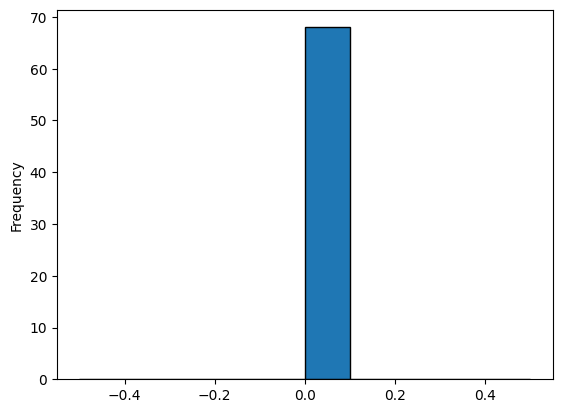

In [189]:
import matplotlib.pyplot as plt
data_series = pd.Series(count_nans)
data_series.plot(kind='hist', edgecolor='black')

plt.show()

Make a cutoff for only samples that have more than 1 cell of the type.

In [169]:
cutoff = pd.DataFrame(groups[groups > 1])
cutoff.groupby(cell_type_key).size()

cell_type_tumor
Alveolar cell type 1               97
Alveolar cell type 2               97
B cell                             97
B cell dividing                    97
Ciliated                           97
Club                               97
DC mature                          97
Endothelial cell arterial          97
Endothelial cell capillary         97
Endothelial cell lymphatic         97
Endothelial cell venous            97
Fibroblast adventitial             97
Fibroblast alveolar                97
Fibroblast peribronchial           97
Macrophage                         97
Macrophage alveolar                97
Mast cell                          97
Mesothelial                        97
Monocyte classical                 97
Monocyte non-classical             97
NK cell                            97
NK cell dividing                   97
Neutrophils                        97
Pericyte                           97
Plasma cell                        97
Plasma cell dividing              

### Cells by type

In [155]:
cutoff.groupby(cell_type_key).sum()

/tmp/ipykernel_133018/1670320304.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cutoff.groupby(cell_type_key).sum()


,0
cell_type_tumor,
Alveolar cell type 1,431.0
Alveolar cell type 2,3879.0
B cell,31639.0
B cell dividing,160.0
Ciliated,1708.0
Club,536.0
DC mature,810.0
Endothelial cell arterial,642.0
Endothelial cell capillary,2773.0


### Total cells:

In [160]:
cutoff.groupby(cell_type_key).sum().sum()

/tmp/ipykernel_145672/3063716256.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cutoff.groupby(cell_type_key).sum().sum()


0    227767.0
dtype: float64

In [11]:
cutoff.groupby('Level_2_cancer').sum().sum()

0    902653.0
dtype: float64

### Matrix of Samples by type

Now to get the mutual information we need to have a matrix where 
we can get the pointwise mutual information (relative entropy) of any
two cell types 
$$
\log{\frac{p(x_i,y_j)}{p(x_i)p(y_j)}}
$$.
To then get the mutual information of those:
$$
\frac{1}{M}\sum_{i,j}{\log{\frac{p(x_i,y_j)}{p(x_i)p(y_j)}}}
$$.

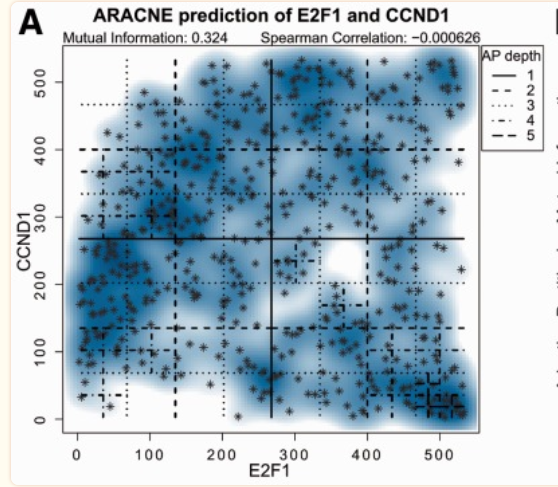

The idea was to get a discrete mutual information, because we are getting counts of cells being present in the tisse to study.
Nevertheless, a discrete mutual information would just be constraining the states to present or not present, or some
discrete states that would nevertheless be ordered and so the ranking that ARACNE does is indeed discrete.

Definitely just having present or not present would give us no info because at this level the clusters almost always have at least one cell.

In [ ]:
groups

In [179]:
adata.obs['sample']

AAACCTGAGAGGTAGA-1_1-1       Chen_Zhang_2020_NSCLC-3
AAACCTGAGATCCTGT-1_1-1       Chen_Zhang_2020_NSCLC-3
AAACCTGAGGAGCGAG-1_1-1       Chen_Zhang_2020_NSCLC-3
AAACCTGAGGCCATAG-1_1-1       Chen_Zhang_2020_NSCLC-3
AAACCTGAGGTTCCTA-1_1-1       Chen_Zhang_2020_NSCLC-3
                                     ...            
811511_27-3               UKIM-V-2_P17_tumor_primary
468397_27-3               UKIM-V-2_P17_tumor_primary
115884_27-3               UKIM-V-2_P17_tumor_primary
201201_27-3               UKIM-V-2_P17_tumor_primary
194204_27-3               UKIM-V-2_P17_tumor_primary
Name: sample, Length: 228084, dtype: category
Categories (68, object): ['Chen_Zhang_2020_NSCLC-1', 'Chen_Zhang_2020_NSCLC-2', 'Chen_Zhang_2020_NSCLC-3', 'Chen_Zhang_2020_NSCLC-6', ..., 'Zilionis_Klein_2019_p4t2', 'Zilionis_Klein_2019_p4t3', 'Zilionis_Klein_2019_p6t1', 'Zilionis_Klein_2019_p6t2']

In [161]:
samp_type = groups.unstack().transpose()
samp_type

cell_type_tumor             Alveolar cell type 1  Alveolar cell type 2  \
  sample                                                                 
0 Chen_Zhang_2020_NSCLC-1                      0                     0   
  Chen_Zhang_2020_NSCLC-2                      0                     3   
  Chen_Zhang_2020_NSCLC-3                      0                     1   
  Chen_Zhang_2020_NSCLC-6                     45                   135   
  Chen_Zhang_2020_NSCLC-7                      0                     0   
...                                          ...                   ...   
  Zilionis_Klein_2019_p4t1                     0                     6   
  Zilionis_Klein_2019_p4t2                     1                     6   
  Zilionis_Klein_2019_p4t3                     1                     3   
  Zilionis_Klein_2019_p6t1                     0                    48   
  Zilionis_Klein_2019_p6t2                     0                    58   

cell_type_tumor             B cell  B cell dividing  Ciliated  Club  \
  sample                                                              
0 Chen_Zhang_2020_NSCLC-1      771                1         0     0   
  Chen_Zhang_2020_NSCLC-2      552                0         0     0   
  Chen_Zhang_2020_NSCLC-3      774                0         5     1   
  Chen_Zhang_2020_NSCLC-6      119                0        41    11   
  Chen_Zhang_2020_NSCLC-7     1841                4         0     1   
...                            ...              ...       ...   ...   
  Zilionis_Klein_2019_p4t1      43                0         0     0   
  Zilionis_Klein_2019_p4t2      29                0         0     0   
  Zilionis_Klein_2019_p4t3      33                0         0     0   
  Zilionis_Klein_2019_p6t1     314                2        10     3   
  Zilionis_Klein_2019_p6t2     272                0         7     2   

cell_type_tumor             DC mature  Endothelial cell arterial  \
  sample                                                           
0 Chen_Zhang_2020_NSCLC-1           1                         17   
  Chen_Zhang_2020_NSCLC-2           4                          1   
  Chen_Zhang_2020_NSCLC-3           5                          0   
  Chen_Zhang_2020_NSCLC-6           9                          4   
  Chen_Zhang_2020_NSCLC-7           6                          0   
...                               ...                        ...   
  Zilionis_Klein_2019_p4t1          1                          0   
  Zilionis_Klein_2019_p4t2          5                          0   
  Zilionis_Klein_2019_p4t3          2                          0   
  Zilionis_Klein_2019_p6t1          4                          3   
  Zilionis_Klein_2019_p6t2          2                          1   

cell_type_tumor             Endothelial cell capillary  \
  sample                                                 
0 Chen_Zhang_2020_NSCLC-1                           80   
  Chen_Zhang_2020_NSCLC-2                            1   
  Chen_Zhang_2020_NSCLC-3                            0   
  Chen_Zhang_2020_NSCLC-6                           63   
  Chen_Zhang_2020_NSCLC-7                            1   
...                                                ...   
  Zilionis_Klein_2019_p4t1                           0   
  Zilionis_Klein_2019_p4t2                           1   
  Zilionis_Klein_2019_p4t3                           0   
  Zilionis_Klein_2019_p6t1                           1   
  Zilionis_Klein_2019_p6t2                           2   

cell_type_tumor             Endothelial cell lymphatic  ...  \
  sample                                                ...   
0 Chen_Zhang_2020_NSCLC-1                            0  ...   
  Chen_Zhang_2020_NSCLC-2                            6  ...   
  Chen_Zhang_2020_NSCLC-3                            0  ...   
  Chen_Zhang_2020_NSCLC-6                            7  ...   
  Chen_Zhang_2020_NSCLC-7                           15  ...   
...                             

Checking below we see the submucosal gland cluster is rare so it wasn't projected by scArches.
This just means that effectively there are no cells with submocusal glands in that subset so we just replace them with zeros.

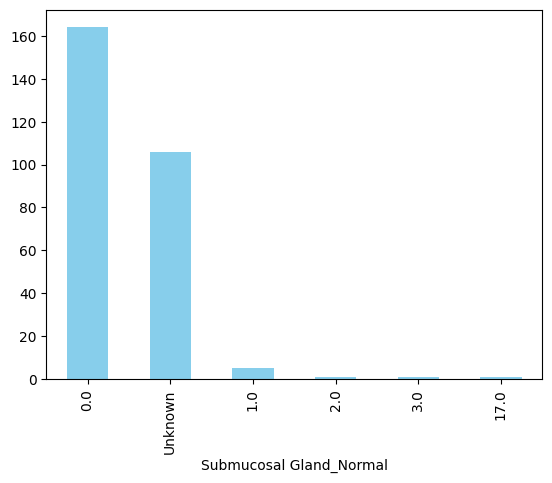

In [14]:
# Count the occurrences of each category
lol = samp_type['Submucosal Gland_Normal'].astype('category')
lol = lol.cat.add_categories('Unknown')
lol = lol.fillna('Unknown')

category_counts = lol.value_counts()

category_counts.plot(kind='bar', color='skyblue')
plt.show()

Most of it is 0's so we will remove that column. Also because our type annotation is very general,
we aren't getting very near to a limit of detection of our algorithm.
Though it would have to be related with our uncertainty.

In [17]:
del samp_type['Submucosal Gland_Normal']
del samp_type['Submucosal Gland_Tumor']

By the way the transfer of the labels is done in scArches, if the cluster is not present (*NA*) the label does not appear. So we replace NAs with 0s

In [162]:
samp_type = samp_type.fillna(0)
samp_type

cell_type_tumor             Alveolar cell type 1  Alveolar cell type 2  \
  sample                                                                 
0 Chen_Zhang_2020_NSCLC-1                      0                     0   
  Chen_Zhang_2020_NSCLC-2                      0                     3   
  Chen_Zhang_2020_NSCLC-3                      0                     1   
  Chen_Zhang_2020_NSCLC-6                     45                   135   
  Chen_Zhang_2020_NSCLC-7                      0                     0   
...                                          ...                   ...   
  Zilionis_Klein_2019_p4t1                     0                     6   
  Zilionis_Klein_2019_p4t2                     1                     6   
  Zilionis_Klein_2019_p4t3                     1                     3   
  Zilionis_Klein_2019_p6t1                     0                    48   
  Zilionis_Klein_2019_p6t2                     0                    58   

cell_type_tumor             B cell  B cell dividing  Ciliated  Club  \
  sample                                                              
0 Chen_Zhang_2020_NSCLC-1      771                1         0     0   
  Chen_Zhang_2020_NSCLC-2      552                0         0     0   
  Chen_Zhang_2020_NSCLC-3      774                0         5     1   
  Chen_Zhang_2020_NSCLC-6      119                0        41    11   
  Chen_Zhang_2020_NSCLC-7     1841                4         0     1   
...                            ...              ...       ...   ...   
  Zilionis_Klein_2019_p4t1      43                0         0     0   
  Zilionis_Klein_2019_p4t2      29                0         0     0   
  Zilionis_Klein_2019_p4t3      33                0         0     0   
  Zilionis_Klein_2019_p6t1     314                2        10     3   
  Zilionis_Klein_2019_p6t2     272                0         7     2   

cell_type_tumor             DC mature  Endothelial cell arterial  \
  sample                                                           
0 Chen_Zhang_2020_NSCLC-1           1                         17   
  Chen_Zhang_2020_NSCLC-2           4                          1   
  Chen_Zhang_2020_NSCLC-3           5                          0   
  Chen_Zhang_2020_NSCLC-6           9                          4   
  Chen_Zhang_2020_NSCLC-7           6                          0   
...                               ...                        ...   
  Zilionis_Klein_2019_p4t1          1                          0   
  Zilionis_Klein_2019_p4t2          5                          0   
  Zilionis_Klein_2019_p4t3          2                          0   
  Zilionis_Klein_2019_p6t1          4                          3   
  Zilionis_Klein_2019_p6t2          2                          1   

cell_type_tumor             Endothelial cell capillary  \
  sample                                                 
0 Chen_Zhang_2020_NSCLC-1                           80   
  Chen_Zhang_2020_NSCLC-2                            1   
  Chen_Zhang_2020_NSCLC-3                            0   
  Chen_Zhang_2020_NSCLC-6                           63   
  Chen_Zhang_2020_NSCLC-7                            1   
...                                                ...   
  Zilionis_Klein_2019_p4t1                           0   
  Zilionis_Klein_2019_p4t2                           1   
  Zilionis_Klein_2019_p4t3                           0   
  Zilionis_Klein_2019_p6t1                           1   
  Zilionis_Klein_2019_p6t2                           2   

cell_type_tumor             Endothelial cell lymphatic  ...  \
  sample                                                ...   
0 Chen_Zhang_2020_NSCLC-1                            0  ...   
  Chen_Zhang_2020_NSCLC-2                            6  ...   
  Chen_Zhang_2020_NSCLC-3                            0  ...   
  Chen_Zhang_2020_NSCLC-6                            7  ...   
  Chen_Zhang_2020_NSCLC-7                           15  ...   
...                             

## Convert for correlation

We first convert to relative abundances with respect to the sample, to be able to compare.

In [47]:
corr_types = samp_type
corr_types = corr_types / corr_types.sum()

Then we transpose back to get the corr matrix

In [48]:
from scipy.stats import pearsonr, spearmanr
import numpy as np

data = corr_types.to_numpy().T
# Initialize matrices for correlation coefficients and p-values
n_variables = data.shape[0]  # Number of variables (rows in the original dataset)
pearson_matrix = np.zeros((n_variables, n_variables))
pearson_p_values = np.zeros((n_variables, n_variables))

# Compute pairwise correlations and p-values
for i in range(n_variables):
    for j in range(n_variables):
        if i == j:
            # The correlation of a variable with itself is always 1, and the p-value is 0
            pearson_matrix[i, j] = 1
            pearson_p_values[i, j] = 0
        elif i < j:
            # Compute correlation and p-value for unique pairs only
            correlation, p_value = pearsonr(data[i], data[j])
            pearson_matrix[i, j] = pearson_matrix[j, i] = correlation
            pearson_p_values[i, j] = pearson_p_values[j, i] = p_value
            
pd.DataFrame(pearson_matrix)


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.000000,0.818019,0.393075,0.034389,0.065311,0.073583,0.669357,-0.031173,0.376617,0.088024,...,0.238543,-0.060661,-0.065449,-0.045235,0.600563,0.780964,0.474276,0.362682,-0.036505,0.711453
1,0.818019,1.000000,0.356313,0.021329,-0.013000,0.042851,0.518085,-0.032927,0.344642,0.100548,...,0.132634,-0.101981,-0.118002,-0.075103,0.604120,0.529672,0.391408,0.458952,-0.076588,0.453297
2,0.393075,0.356313,1.000000,0.849347,-0.050197,0.030011,0.280356,0.061118,0.214914,0.028554,...,-0.036346,-0.093162,-0.101925,-0.074031,0.569179,0.150067,-0.012589,0.450684,-0.085878,0.052555
3,0.034389,0.021329,0.849347,1.000000,-0.069053,-0.029362,0.136947,-0.009509,-0.025971,-0.001433,...,-0.057643,-0.068978,-0.082876,-0.059121,0.333299,0.006934,-0.059140,0.210686,-0.077058,-0.038628
4,0.065311,-0.013000,-0.050197,-0.069053,1.000000,0.899050,0.045784,-0.026421,-0.018133,0.009831,...,-0.006347,-0.032258,-0.005292,0.011835,-0.017410,0.113624,0.078106,0.015664,0.053883,0.126986
5,0.073583,0.042851,0.030011,-0.029362,0.899050,1.000000,0.014476,-0.047191,0.124442,-0.005212,...,0.017715,-0.043745,-0.004824,0.103108,-0.007573,-0.012954,0.010131,0.072652,0.088764,-0.017526
6,0.669357,0.518085,0.280356,0.136947,0.045784,0.014476,1.000000,-0.016710,0.292915,0.128131,...,0.299387,-0.070494,-0.062590,-0.063146,0.559458,0.685102,0.452379,0.406998,-0.031098,0.605303
7,-0.031173,-0.032927,0.061118,-0.009509,-0.026421,-0.047191,-0.016710,1.000000,0.101858,0.239390,...,0.001845,-0.037394,-0.021377,-0.014495,0.118786,0.030618,0.012165,0.020964,-0.032350,-0.009360
8,0.376617,0.344642,0.214914,-0.025971,-0.018133,0.124442,0.292915,0.101858,1.000000,0.295615,...,0.698486,-0.038211,0.009681,-0.020341,0.304996,0.137682,0.065741,0.273185,0.262797,0.056348
9,0.088024,0.100548,0.028554,-0.001433,0.009831,-0.005212,0.128131,0.239390,0.295615,1.000000,...,0.174579,-0.056311,-0.060989,-0.038339,0.486994,0.117004,0.048705,0.148173,0.025299,0.081208


In [49]:
# pearson_df = 
pearson_df = pd.DataFrame(pearson_matrix, columns=samp_type.columns, index=samp_type.columns)
pearson_p_values_df = pd.DataFrame(pearson_p_values, columns=samp_type.columns, index=samp_type.columns)

In [32]:
pearson_p_values_df

Level_2_cancer,Airway epithelium_Normal,Airway epithelium_Tumor,Alveolar epithelium_Normal,Alveolar epithelium_Tumor,Blood vessels_Normal,Blood vessels_Tumor,Fibroblast lineage_Normal,Fibroblast lineage_Tumor,Lymphatic EC_Normal,Lymphatic EC_Tumor,Lymphoid_Normal,Lymphoid_Tumor,Mesothelium_Normal,Myeloid_Normal,Myeloid_Tumor,Smooth muscle_Normal,Smooth muscle_Tumor,Unknown_Normal,Unknown_Tumor
Level_2_cancer,,,,,,,,,,,,,,,,,,,
Airway epithelium_Normal,0.000000e+00,6.808801e-01,3.013565e-04,5.056290e-01,1.010436e-01,9.485192e-01,7.489726e-02,6.936376e-01,4.116509e-01,8.172753e-01,6.832288e-01,7.415857e-01,1.028746e-03,6.148868e-09,0.918160,8.744965e-02,9.275841e-01,9.973866e-31,6.051096e-01
Airway epithelium_Tumor,6.808801e-01,0.000000e+00,3.322625e-01,9.483919e-01,5.484234e-01,9.625147e-01,9.830186e-02,5.378893e-03,4.659337e-01,8.859342e-01,5.302011e-02,3.019184e-03,5.878956e-01,2.006717e-01,0.787345,2.370741e-02,1.865907e-14,3.696594e-01,1.075399e-02
Alveolar epithelium_Normal,3.013565e-04,3.322625e-01,0.000000e+00,5.564444e-01,2.954646e-01,7.330074e-01,1.573337e-01,4.644158e-01,5.404440e-01,8.349258e-01,2.004360e-01,7.140386e-01,2.150549e-02,4.822498e-04,0.428952,8.300983e-01,5.928788e-01,1.546441e-28,8.959377e-01
Alveolar epithelium_Tumor,5.056290e-01,9.483919e-01,5.564444e-01,0.000000e+00,8.029691e-01,9.117326e-01,3.617777e-02,1.151327e-04,5.874647e-01,1.823055e-07,2.139199e-02,1.673395e-02,5.725986e-01,6.468842e-01,0.493959,6.404726e-02,5.160380e-01,9.182281e-01,7.036953e-43
Blood vessels_Normal,1.010436e-01,5.484234e-01,2.954646e-01,8.029691e-01,0.000000e+00,2.915776e-45,5.680940e-01,9.010799e-01,5.545718e-17,9.097010e-01,2.000152e-01,5.539644e-01,7.842310e-01,6.693290e-01,0.243466,5.243933e-01,8.257452e-01,6.890767e-04,6.462566e-01
Blood vessels_Tumor,9.485192e-01,9.625147e-01,7.330074e-01,9.117326e-01,2.915776e-45,0.000000e+00,7.425146e-01,9.445407e-01,8.175545e-01,8.897253e-01,4.978629e-01,9.799762e-01,8.488897e-01,5.528308e-01,0.703708,7.371321e-01,9.521451e-01,2.861900e-02,8.728442e-01
Fibroblast lineage_Normal,7.489726e-02,9.830186e-02,1.573337e-01,3.617777e-02,5.680940e-01,7.425146e-01,0.000000e+00,1.436842e-04,6.021930e-01,1.772391e-01,2.200967e-01,8.364154e-08,1.891515e-04,2.267756e-03,0.847831,2.465942e-09,8.056461e-01,1.453745e-03,2.842004e-01
Fibroblast lineage_Tumor,6.936376e-01,5.378893e-03,4.644158e-01,1.151327e-04,9.010799e-01,9.445407e-01,1.436842e-04,0.000000e+00,5.674400e-01,7.699506e-03,1.427916e-01,2.264070e-03,6.061169e-01,1.301960e-01,0.623065,9.333992e-12,7.014197e-01,8.050783e-01,7.349828e-07
Lymphatic EC_Normal,4.116509e-01,4.659337e-01,5.404440e-01,5.874647e-01,5.545718e-17,8.175545e-01,6.021930e-01,5.674400e-01,0.000000e+00,7.856685e-01,2.507217e-01,4.277124e-01,3.365811e-01,1.692062e-01,0.249770,6.211775e-01,7.948603e-01,2.611634e-01,4.104297e-01


In [33]:
pearson_df

Level_2_cancer,Airway epithelium_Normal,Airway epithelium_Tumor,Alveolar epithelium_Normal,Alveolar epithelium_Tumor,Blood vessels_Normal,Blood vessels_Tumor,Fibroblast lineage_Normal,Fibroblast lineage_Tumor,Lymphatic EC_Normal,Lymphatic EC_Tumor,Lymphoid_Normal,Lymphoid_Tumor,Mesothelium_Normal,Myeloid_Normal,Myeloid_Tumor,Smooth muscle_Normal,Smooth muscle_Tumor,Unknown_Normal,Unknown_Tumor
Level_2_cancer,,,,,,,,,,,,,,,,,,,
Airway epithelium_Normal,1.000000,-0.024774,0.215186,-0.040088,0.098554,0.003890,0.106998,-0.023730,0.049432,-0.013920,0.024581,-0.019865,0.195846,0.339727,-0.006190,0.102691,0.005476,0.618435,-0.031144
Airway epithelium_Tumor,-0.024774,1.000000,-0.058364,-0.003900,-0.036144,-0.002832,0.099351,0.166522,-0.043906,0.008642,-0.116169,0.177263,-0.032639,-0.076981,-0.016251,0.135640,0.437950,-0.054009,0.152764
Alveolar epithelium_Normal,0.215186,-0.058364,1.000000,0.035422,0.062969,0.020550,0.085041,-0.044055,0.036867,-0.012554,0.077021,-0.022074,0.137847,0.207985,-0.047628,0.012927,-0.032204,0.599679,-0.007880
Alveolar epithelium_Tumor,-0.040088,-0.003900,0.035422,1.000000,-0.015031,0.006679,0.125713,0.229229,-0.032676,0.306677,0.137965,0.143396,-0.033984,-0.027594,-0.041193,0.111223,0.039114,-0.006185,0.703795
Blood vessels_Normal,0.098554,-0.036144,0.062969,-0.015031,1.000000,0.717586,0.034383,-0.007488,0.474065,0.006833,-0.077093,-0.035645,0.016495,0.025726,-0.070184,0.038339,-0.013264,0.202354,-0.027646
Blood vessels_Tumor,0.003890,-0.002832,0.020550,0.006679,0.717586,1.000000,-0.019791,0.004191,-0.013898,0.008353,-0.040822,0.001512,-0.011479,-0.035747,-0.022910,-0.020220,-0.003616,0.131292,0.009642
Fibroblast lineage_Normal,0.106998,0.099351,0.085041,0.125713,0.034383,-0.019791,1.000000,0.226073,0.031396,0.081158,0.073779,0.314635,0.222093,0.182374,-0.011560,0.348005,0.014823,0.190062,0.064454
Fibroblast lineage_Tumor,-0.023730,0.166522,-0.044055,0.229229,-0.007488,0.004191,0.226073,1.000000,-0.034441,0.159528,-0.088119,0.182403,-0.031058,-0.090985,0.029606,0.393945,-0.023096,-0.014867,0.291820
Lymphatic EC_Normal,0.049432,-0.043906,0.036867,-0.032676,0.474065,-0.013898,0.031396,-0.034441,1.000000,-0.016383,-0.069117,-0.047756,0.057846,0.082684,-0.069256,0.029767,-0.015664,0.067619,-0.049561


We also get the spearman matrix

In [34]:
data = corr_types.to_numpy().T
# Initialize matrices for correlation coefficients and p-values
n_variables = data.shape[0]  # Number of variables (rows in the original dataset)
spearman_matrix = np.zeros((n_variables, n_variables))
spearman_p_values = np.zeros((n_variables, n_variables))

# Compute pairwise correlations and p-values
for i in range(n_variables):
    for j in range(n_variables):
        if i == j:
            # The correlation of a variable with itself is always 1, and the p-value is 0
            spearman_matrix[i, j] = 1
            spearman_p_values[i, j] = 0
        elif i < j:
            # Compute correlation and p-value for unique pairs only
            correlation, p_value = spearmanr(data[i], data[j])
            spearman_matrix[i, j] = spearman_matrix[j, i] = correlation
            spearman_p_values[i, j] = spearman_p_values[j, i] = p_value
            
pd.DataFrame(spearman_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.054448,0.430467,0.043169,0.387621,0.045975,0.263220,-0.029734,0.212545,0.012355,0.169699,0.064092,0.212845,0.359428,0.081242,0.243884,0.071425,0.650183,0.015920
1,0.054448,1.000000,-0.287504,0.387801,-0.035155,0.388660,0.141229,0.238126,-0.232031,0.148540,-0.266308,0.641425,-0.100191,-0.205349,0.469559,0.020559,0.195823,-0.004579,0.808547
2,0.430467,-0.287504,1.000000,0.133900,0.481247,-0.123077,0.282848,-0.137876,0.403562,0.033851,0.384747,-0.192019,0.228046,0.588502,-0.243445,0.265683,-0.095121,0.489141,-0.191959
3,0.043169,0.387801,0.133900,1.000000,0.041001,0.239426,0.092131,0.133212,-0.006224,0.242215,0.080991,0.290254,0.015426,0.056027,0.176506,0.111138,0.144931,0.164954,0.610825
4,0.387621,-0.035155,0.481247,0.041001,1.000000,0.169632,0.667336,0.182221,0.643935,0.175514,0.249390,-0.007487,0.231192,0.523796,-0.089794,0.609171,0.069314,0.415279,-0.025033
5,0.045975,0.388660,-0.123077,0.239426,0.169632,1.000000,0.195027,0.267114,0.004726,0.188683,-0.095459,0.427431,0.073536,-0.148281,0.272041,0.110386,0.228920,0.026606,0.388416
6,0.263220,0.141229,0.282848,0.092131,0.667336,0.195027,1.000000,0.185717,0.436836,0.119387,0.165068,0.107699,0.182425,0.350715,-0.039531,0.682024,0.094609,0.364135,0.140309
7,-0.029734,0.238126,-0.137876,0.133212,0.182221,0.267114,0.185717,1.000000,0.010798,0.210686,-0.110061,0.244368,-0.044474,-0.125619,0.226060,0.194642,-0.025656,0.119771,0.283049
8,0.212545,-0.232031,0.403562,-0.006224,0.643935,0.004726,0.436836,0.010798,1.000000,0.150183,0.441999,-0.172890,0.281277,0.550776,-0.188612,0.368443,0.026065,0.215840,-0.211817
9,0.012355,0.148540,0.033851,0.242215,0.175514,0.188683,0.119387,0.210686,0.150183,1.000000,0.080816,0.155066,0.011141,0.065396,0.044383,0.070859,0.189919,0.053060,0.179529


In [60]:
spearman_df = pd.DataFrame(spearman_matrix, columns=samp_type.columns, index=samp_type.columns)
spearman_p_values_df = pd.DataFrame(spearman_p_values, columns=samp_type.columns, index=samp_type.columns)

### Convert to graph

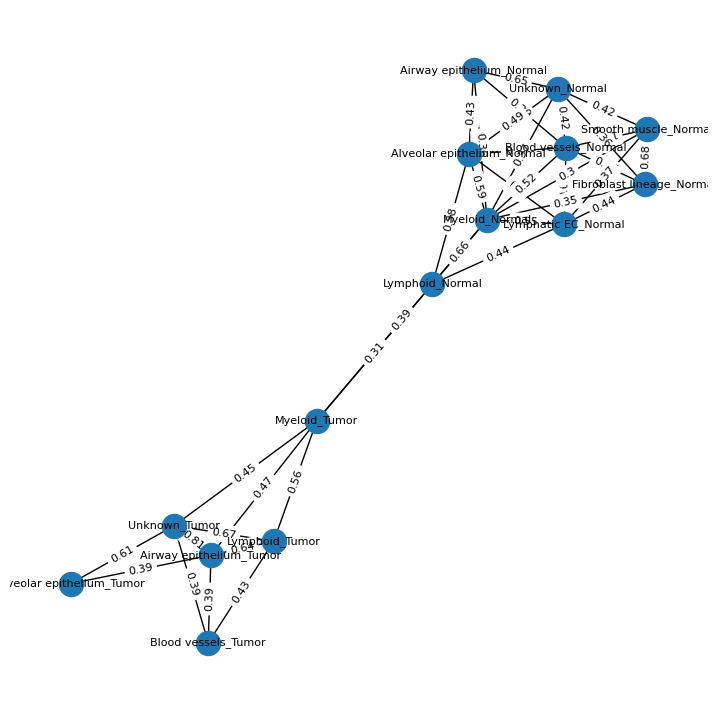

In [105]:
import networkx as nx
# Create a graph from the correlation DataFrame
G = nx.Graph()

# Add edges between all nodes with correlation as edge attribute
for col1 in spearman_df.columns:
    for col2 in spearman_df.index:
        if col1 != col2:
            # Add an edge between col1 and col2 with the correlation as an attribute
            G.add_edge(col1, col2, weight=abs(round(spearman_df.loc[col1, col2],2)))

# Remove edges with very low correlation and high p-value
threshold = 0.3
threshold_p = 0.05
for (u, v, d) in list(G.edges(data=True)):
    if abs(d['weight']) < threshold or abs(spearman_p_values_df.loc[u, v]) > threshold_p:
        G.remove_edge(u, v)

# Remove all nodes with no edges
nodes_with_no_edges = [node for node, degree in G.degree() if degree == 0]
G.remove_nodes_from(nodes_with_no_edges)

plt.figure(figsize=(9, 9))  # Increase figure size
pos = nx.spring_layout(G, )  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=300)

# edges
nx.draw_networkx_edges(G, pos, width=1.0)

# labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

# edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.axis('off')  # Turn off the axis
plt.show()

In [106]:
G_spear = G

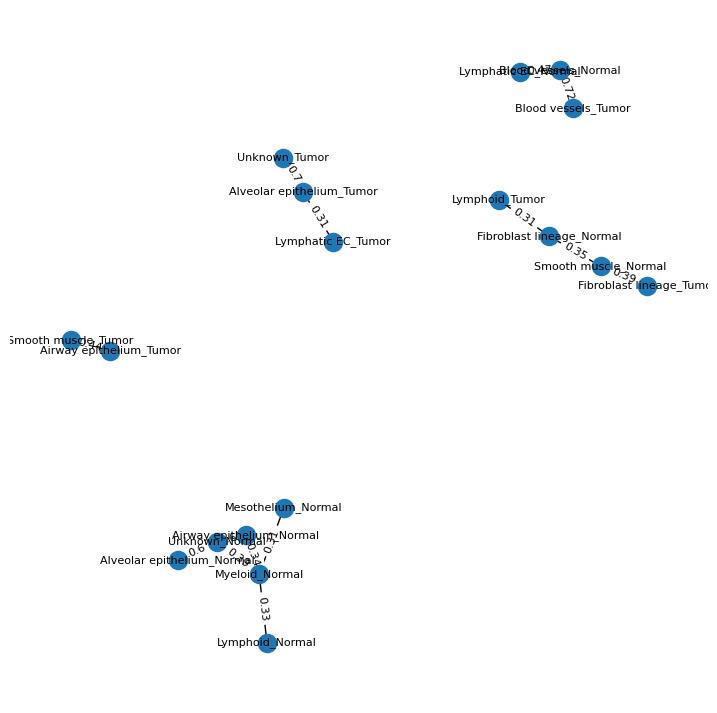

In [101]:
import networkx as nx
# Create a graph from the correlation DataFrame
G = nx.Graph()

# Add edges between all nodes with correlation as edge attribute
for col1 in pearson_df.columns:
    for col2 in pearson_df.index:
        if col1 != col2:
            # Add an edge between col1 and col2 with the correlation as an attribute
            G.add_edge(col1, col2, weight=(round(pearson_df.loc[col1, col2],2)))

# Remove edges with very low correlation and high p-value
threshold = 0.3 
threshold_p = 0.05
for (u, v, d) in list(G.edges(data=True)):
    if abs(d['weight']) < threshold or abs(pearson_p_values_df.loc[u, v]) > threshold_p:
        G.remove_edge(u, v)

# Remove all nodes with no edges
nodes_with_no_edges = [node for node, degree in G.degree() if degree == 0]
G.remove_nodes_from(nodes_with_no_edges)

plt.figure(figsize=(9, 9))  # Increase figure size
pos = nx.spring_layout(G, )  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=170)

# edges
nx.draw_networkx_edges(G, pos, width=1.0)

# labels
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

# edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.axis('off')  # Turn off the axis
plt.show()

In [84]:
G_pear = G

## Calcualte MI with ARACNE AP

We export in a format that can be used for ARACNE AP, which has the 'genes' in the rows and only considers Target/TF pairs.
We repeat each type row because every type is a TF and a target.

In [52]:
aracne_dir = 'outputARACNE'
aracne_types = samp_type.transpose()

# Repeat to force ARACNE to consider types as target and TF.
aracne_types = pd.concat([aracne_types, aracne_types])

aracne_types.astype(int)
aracne_types.columns.name = None
aracne_types.index.name = 'types'
aracne_types

0                          \
sample                Chen_Zhang_2020_NSCLC-4 Chen_Zhang_2020_NSCLC-5   
types                                                                   
Alveolar cell type 1                        0                       1   
Alveolar cell type 2                        2                       6   
B cell                                    295                    1572   
B cell dividing                             4                      42   
Ciliated                                    1                       4   
...                                       ...                     ...   
cDC2                                        8                      30   
myeloid dividing                            1                       2   
pDC                                         3                      14   
stromal dividing                            1                       0   
transitional club/AT2                       5                       7   

                                                                       \
sample                Chen_Zhang_2020_NSCLC-8 Chen_Zhang_2020_NSCLC-9   
types                                                                   
Alveolar cell type 1                       53                       0   
Alveolar cell type 2                      350                      27   
B cell                                    147                       0   
B cell dividing                             0                       0   
Ciliated                                   61                       0   
...                                       ...                     ...   
cDC2                                     1128                       0   
myeloid dividing                          212                       0   
pDC                                         6                       0   
stromal dividing                            0                       0   
transitional club/AT2                    2515                     189   

                                                                         \
sample                Chen_Zhang_2020_NSCLC-10 Guo_Zhang_2018_P0617_TTC   
types                                                                     
Alveolar cell type 1                        56                        0   
Alveolar cell type 2                       587                        0   
B cell                                    1128                        0   
B cell dividing                              5                        0   
Ciliated                                     5                        0   
...                                        ...                      ...   
cDC2                                       228                        0   
myeloid dividing                            18                        0   
pDC                                         29                        0   
stromal dividing                             3                        0   
transitional club/AT2                      162                        0   

                                                                         \
sample                Guo_Zhang_2018_P0617_TTH Guo_Zhang_2018_P0617_TTR   
types                                                                     
Alveolar cell type 1                         0                        0   
Alveolar cell type 2                         0                        0   
B cell                                       0                        0   
B cell dividing                              0                        0   
Ciliated                                     0                        0   
...                                        ...                      ...   
cDC2                                         0                        0   
myeloid dividing                             0                        0   
pDC                                          0                        0   
stromal dividing                             0 

In [53]:
aracne_types.index

CategoricalIndex(['Alveolar cell type 1', 'Alveolar cell type 2', 'B cell',
                  'B cell dividing', 'Ciliated', 'Club', 'DC mature',
                  'Endothelial cell arterial', 'Endothelial cell capillary',
                  'Endothelial cell lymphatic',
                  ...
                  'Tumor cells LUAD mitotic', 'Tumor cells LUSC',
                  'Tumor cells LUSC mitotic', 'Tumor cells NSCLC mixed',
                  'cDC1', 'cDC2', 'myeloid dividing', 'pDC',
                  'stromal dividing', 'transitional club/AT2'],
                 categories=['Alveolar cell type 1', 'Alveolar cell type 2', 'B cell', 'B cell dividing', ..., 'myeloid dividing', 'pDC', 'stromal dividing', 'transitional club/AT2'], ordered=False, dtype='category', name='types', length=102)

In [54]:
tfs = aracne_types.index[0:int(aracne_types.shape[0]/2)]

with open(f'{aracne_dir}/tfs{time}.txt', 'w') as f:
    for tf in tfs:
        f.write(str(tf) + '\n')

In [55]:
! cat tfs{time}.txt

187140.84s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
cat: tfsIII-IVless.txt: No such file or directory


In [56]:
a = aracne_types.reset_index()
a.columns = a.columns.get_level_values('sample')
a = a.set_index([''])

In [57]:
a.to_csv(f'{aracne_dir}/matrix{time}.txt', sep='\t')

In [58]:
! head {aracne_dir}/matrix{time}.txt

187148.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
	Chen_Zhang_2020_NSCLC-4	Chen_Zhang_2020_NSCLC-5	Chen_Zhang_2020_NSCLC-8	Chen_Zhang_2020_NSCLC-9	Chen_Zhang_2020_NSCLC-10	Guo_Zhang_2018_P0617_TTC	Guo_Zhang_2018_P0617_TTH	Guo_Zhang_2018_P0617_TTR	Guo_Zhang_2018_P0729_TTC	Guo_Zhang_2018_P0729_TTH	Guo_Zhang_2018_P0913_TTC	Guo_Zhang_2018_P0913_TTH	Guo_Zhang_2018_P0913_TTR	Guo_Zhang_2018_P0913_TTY	Kim_Lee_2020_LUNG_T28	Kim_Lee_2020_LUNG_T31	Lambrechts_Thienpont_2018_6149v2_BT1290	Lambrechts_Thienpont_2018_6149v2_BT1291	Lambrechts_Thienpont_2018_6149v2_BT1292	Lambrechts_Thienpont_2018_6653_scrBT1430m	Lambrechts_Thienpont_2018_6653_scrBT1431m	Lambrechts_Thienpont_2018_6653_scrBT1432m	Maynard_Bivona_2020_LT_S74	UKIM-V-2_P7_tumor_primary	UKIM-V-2_P11_tumor_primary	UKIM-V-2_P12_tumor_primary	Wu_Zhou_2021_GSM4453576	Wu_Zhou_2021_GSM4453577	Wu_Zhou_2021_GSM4453578	Wu_Zhou_2021_GSM4453579	Wu_Zhou_2021_GSM4453580	Wu_Zhou_2021_GSM4453581	Wu_Zhou_2021_GS

We use [ARACNE-AP](https://github.com/califano-lab/ARACNe-AP/tree/master) because it is fast 
and we dont need many libraries. Just JAVA. Downlaod the git repo and change the path to that.

First we must calculate the threshold

In [141]:
! java -Xmx5G -jar /root/host_home/ARACNe-AP/dist/aracne.jar -e {aracne_dir}/matrix{time}.txt  -o {aracne_dir} \
    --tfs {aracne_dir}/tfs{time}.txt --pvalue 1E-8 --seed 1 \
    --calculateThreshold

237154.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
MI threshold file was already there, but I am recalculating it.
Finding threshold for 72 samples
Parameters for fitted threshold function: [0.27993110929608644, 6.225412312559826E-6]
MI threshold: 0.3160628243802694


In [142]:
%%time
%%bash -s {aracne_dir} {time}
echo $1
for i in {1..500}
do
java -Xmx5G -jar /root/host_home/ARACNe-AP/dist/aracne.jar -e $1/matrix$2.txt  -o $1 --tfs $1/tfs$2.txt --pvalue 1E-8 --seed $i
done


outputARACNE
Bootstrapping input matrix 1 with 102 genes and 72 samples
MI threshold file is present
Calculate network from: outputARACNE/matrixIII-IVless.txt
TFs processed: 51
Time elapsed for calculating MI: 0 sec

DPI time elapsed: 0 sec
Edges removed by DPI:	49
Final Network size:	64
Total time elapsed: 0 sec
Bootstrapping input matrix 1 with 102 genes and 72 samples
MI threshold file is present
Calculate network from: outputARACNE/matrixIII-IVless.txt
TFs processed: 51
Time elapsed for calculating MI: 0 sec

DPI time elapsed: 0 sec
Edges removed by DPI:	65
Final Network size:	69
Total time elapsed: 0 sec
Bootstrapping input matrix 1 with 102 genes and 72 samples
MI threshold file is present
Calculate network from: outputARACNE/matrixIII-IVless.txt
TFs processed: 51
Time elapsed for calculating MI: 0 sec

DPI time elapsed: 0 sec
Edges removed by DPI:	37
Final Network size:	64
Total time elapsed: 0 sec
Bootstrapping input matrix 1 with 102 genes and 72 samples
MI threshold file is p

In [143]:
!java -Xmx5G -jar /root/host_home/ARACNe-AP/dist/aracne.jar -o {aracne_dir} --consolidate && rm {aracne_dir}/bootstrap*

237291.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Integrating 500 bootstraps...
bootstrapNetwork_l4p2t9hfverncrf8684hqmr7qk.txt
bootstrapNetwork_ift2tvkh9hlvkedn3pkd27unh2.txt
bootstrapNetwork_ukq2tnit5eoauv4u97u5jt34hr.txt
bootstrapNetwork_36mas798aeb42oal9mbscbl1cc.txt
bootstrapNetwork_4j4qtpg1fqhu2ogb0itbji9jng.txt
bootstrapNetwork_thhiu7m0654ob994dqfl6k1s3j.txt
bootstrapNetwork_h2aj10b3vmbanqlqo05eegi42c.txt
bootstrapNetwork_gvlevo1kp4i3703dlb22elfv91.txt
bootstrapNetwork_l16iudkrmq5tq817i5sh8n9t6g.txt
bootstrapNetwork_a6sb064ava9k4ialdf7t4hf26m.txt
bootstrapNetwork_tb5v26h8afi0c7mfq56l98kb2i.txt
bootstrapNetwork_77q6v9vgbagh0av8nhkphkv888.txt
bootstrapNetwork_bd3714b0tf1d24ht5idvqtc4ka.txt
bootstrapNetwork_7452u1k1kpn5fgcrcshdhpr3mt.txt
bootstrapNetwork_9s710cu07sqp66fffaj4hpllm.txt
bootstrapNetwork_ji86vru96ocs6rfu5ou4tsiq4h.txt
bootstrapNetwork_s68b1easck567n68c3korketqv.txt
bootstrapNetwork_69n24g9vj6t72oerc2ej26api.txt
bootstrapNe

Save with unique filename and removing frist line for using for graphs

In [144]:
! sed '1d' {aracne_dir}/network.txt > {aracne_dir}/net{time}.txt

237299.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [88]:
! cat {aracne_dir}/net{time}.txt

189716.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Pericyte	Endothelial cell venous	0.4386399954908354	1.2278178473934531E-11
T cell CD8 dividing	T cell regulatory	0.49995743391325803	0.002094915661871255
Alveolar cell type 2	cDC2	0.37312782298954256	0.002094915661871255
cDC2	pDC	0.376844276562871	4.273368858775939E-8
T cell CD8 activated	T cell CD4	0.5258220451854655	1.2017987756962611E-5
Pericyte	Fibroblast peribronchial	0.4318522356119105	0.0
NK cell	T cell CD8 naive	0.5687363422958968	0.010372875443579233
Fibroblast peribronchial	Tumor cells LUSC	0.4255698167021686	7.106569285042497E-5
cDC2	Macrophage	0.5339219771435132	0.0
T cell CD4	B cell	0.5261438069262903	0.0
Monocyte non-classical	cDC2	0.408519813371296	0.0480494481433027
Mast cell	Macrophage	0.4442923010576667	0.010372875443579233
T cell CD8 terminally exhausted	Plasma cell	0.4191654131451082	1.2017987756962611E-5
Tumor cells LUSC	Tumor cells LUSC mitotic	0.7540986734624654	0.0
M

### Paint MI network

In [163]:
import numpy as np
import pandas as pd

import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

import matplotlib.pyplot as plt

In [164]:
G = nx.read_edgelist(f"{aracne_dir}/net{time}.txt", data=(("MI", float),('p', float)), delimiter='\t')
list(G.edges(data=True))

[('Tumor cells LUAD EMT',
  'Tumor cells LUSC mitotic',
  {'MI': 0.3300976265128877, 'p': 3.398436049240061e-05}),
 ('Tumor cells LUAD EMT',
  'Tumor cells LUSC',
  {'MI': 0.31455191488774836, 'p': 3.398436049240061e-05}),
 ('Tumor cells LUSC mitotic',
  'Tumor cells LUSC',
  {'MI': 0.516719182790148, 'p': 0.0}),
 ('Tumor cells LUSC mitotic',
  'Tumor cells LUAD',
  {'MI': 0.3668421464038363, 'p': 5.350168086337703e-08}),
 ('Monocyte classical', 'pDC', {'MI': 0.6108027493321005, 'p': 0.0}),
 ('Monocyte classical',
  'Tumor cells LUAD',
  {'MI': 0.5665284029993656, 'p': 0.0}),
 ('Monocyte classical',
  'Fibroblast peribronchial',
  {'MI': 0.4528300784055405, 'p': 0.010754091947218214}),
 ('Monocyte classical',
  'B cell',
  {'MI': 0.5981201729706421, 'p': 1.4607848763947828e-06}),
 ('Monocyte classical',
  'Monocyte non-classical',
  {'MI': 0.46504246277853156, 'p': 0.00015372909716870886}),
 ('Monocyte classical',
  'transitional club/AT2',
  {'MI': 0.5302777942898569, 'p': 0.000153729

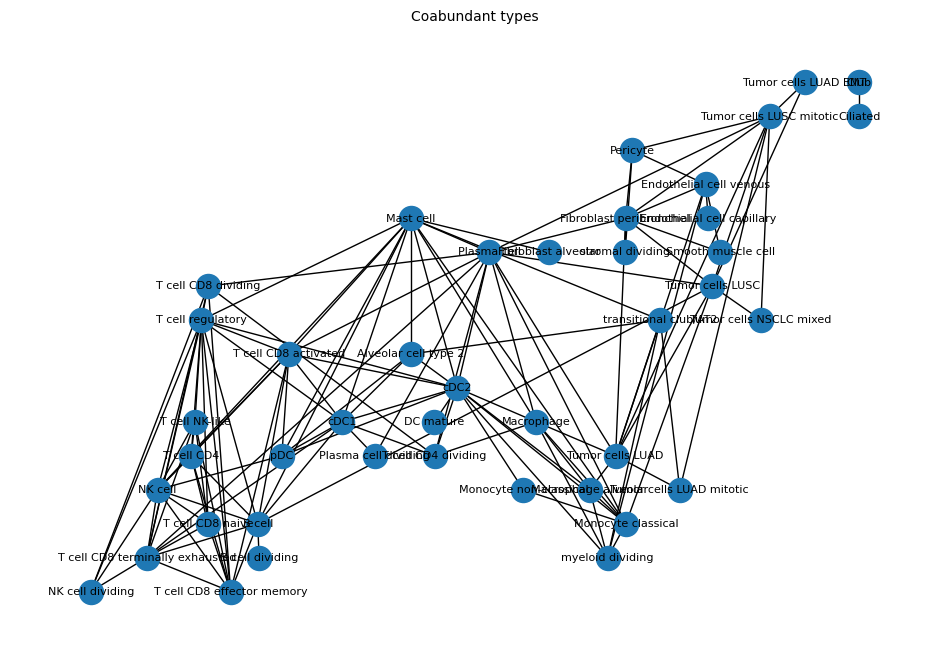

In [147]:
plt.figure(figsize=(12, 8))  # Set a larger figure size (width, height in inches)
plt.title('Coabundant types', fontsize=10)  # Smaller title font size

pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, font_size=8)  # Smaller label font size
plt.savefig(f'{aracne_dir}/coabundant_types{time}.png')

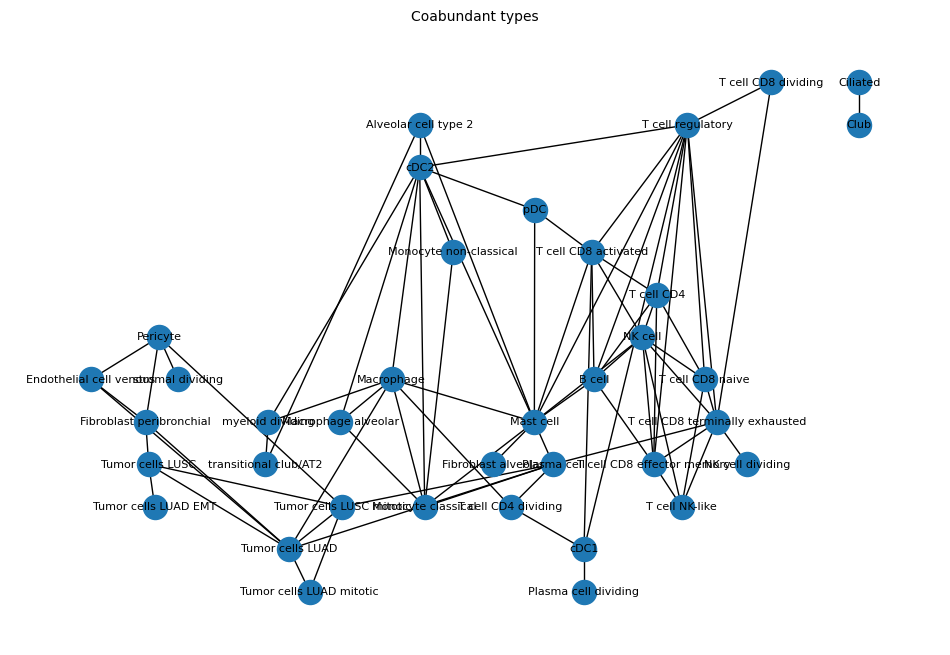

In [93]:
plt.figure(figsize=(12, 8))  # Set a larger figure size (width, height in inches)
plt.title('Coabundant types', fontsize=10)  # Smaller title font size

pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, font_size=8)  # Smaller label font size
plt.savefig(f'{aracne_dir}/coabundant_types{time}.png')

In [67]:
G_MI = G

In [115]:
adata.obs.columns

Index(['sample', 'uicc_stage', 'ever_smoker', 'age', 'donor_id', 'origin',
       'dataset', 'ann_fine', 'cell_type_predicted', 'doublet_status',
       'leiden', 'n_genes_by_counts', 'total_counts', 'total_counts_mito',
       'pct_counts_mito', 'ann_coarse', 'cell_type_tumor', 'tumor_stage',
       'EGFR_mutation', 'TP53_mutation', 'ALK_mutation', 'BRAF_mutation',
       'ERBB2_mutation', 'KRAS_mutation', 'ROS_mutation', 'origin_fine',
       'study', 'platform', 'cell_type_major', 'cell_type_neutro',
       'cell_type_neutro_coarse', 'suspension_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id',
       'tissue_ontology_term_id', 'tissue_type', 'cell_type', 'assay',
       'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'obser

In [126]:
adata.obs.ann_coarse.cat.categories

Index(['B cell', 'Endothelial cell', 'Epithelial cell', 'Macrophage/Monocyte',
       'Mast cell', 'NK cell', 'Neutrophils', 'Plasma cell', 'Stromal',
       'T cell', 'cDC', 'pDC'],
      dtype='object')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

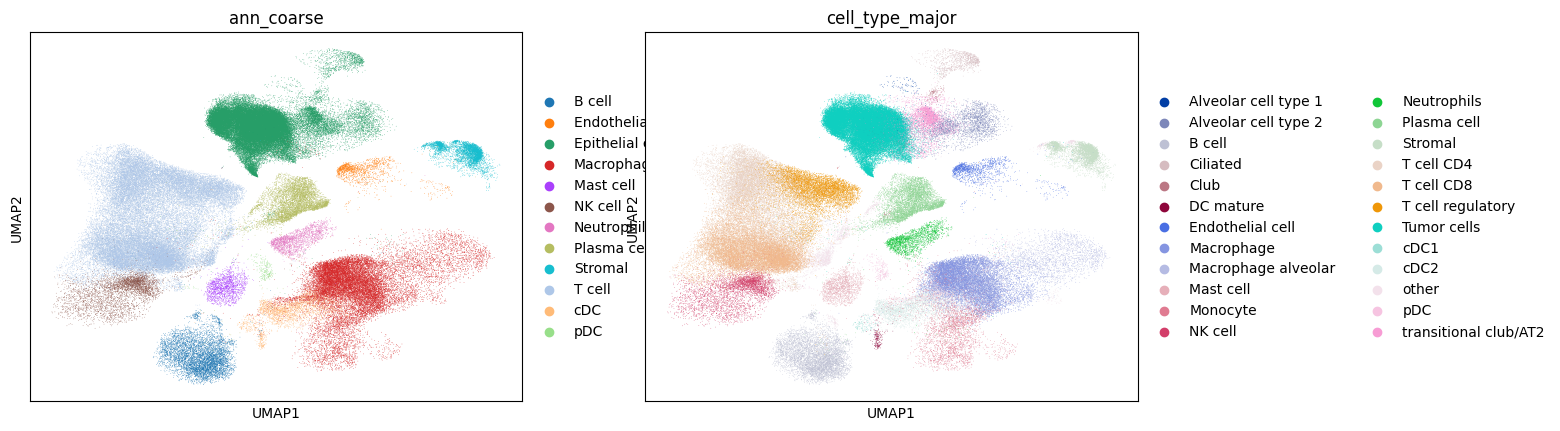

In [128]:
sc.pl.umap(adata, color=['ann_coarse','cell_type_major'])

In [125]:
adata.obs.cell_type_major.cat.categories

Index(['Alveolar cell type 1', 'Alveolar cell type 2', 'B cell', 'Ciliated',
       'Club', 'DC mature', 'Endothelial cell', 'Macrophage',
       'Macrophage alveolar', 'Mast cell', 'Monocyte', 'NK cell',
       'Neutrophils', 'Plasma cell', 'Stromal', 'T cell CD4', 'T cell CD8',
       'T cell regulatory', 'Tumor cells', 'cDC1', 'cDC2', 'other', 'pDC',
       'transitional club/AT2'],
      dtype='object')

In [68]:
G = nx.read_edgelist(f"{aracne_dir}/net_no_cancer.txt", data=(("MI", str),), delimiter='\t')
list(G.edges(data=True))

[('Lymphatic EC', 'Blood vessels', {'MI': '0.28237782131520817'}),
 ('Lymphatic EC', 'Myeloid', {'MI': '0.1125293287963105'}),
 ('Blood vessels', 'Smooth muscle', {'MI': '0.2081188843891475'}),
 ('Blood vessels', 'Myeloid', {'MI': '0.17572637686214776'}),
 ('Blood vessels', 'Fibroblast lineage', {'MI': '0.29667128232006323'}),
 ('Myeloid', 'Lymphoid', {'MI': '0.17747374716515907'}),
 ('Myeloid', 'Alveolar epithelium', {'MI': '0.12418377909800515'}),
 ('Lymphoid', 'Alveolar epithelium', {'MI': '0.11453408820865185'}),
 ('Alveolar epithelium', 'Unknown', {'MI': '0.13703129801696612'}),
 ('Alveolar epithelium', 'Airway epithelium', {'MI': '0.11947828749822431'}),
 ('Unknown', 'Airway epithelium', {'MI': '0.23103608471959003'}),
 ('Smooth muscle', 'Fibroblast lineage', {'MI': '0.26457154237473635'})]

In [69]:
G.nodes['Myeloid']['color'] = 'blue'
G.nodes['Lymphoid']['color'] = 'blue'
G.nodes['Lymphatic EC']['color'] = 'blue'
G.nodes['Alveolar epithelium']['color'] = 'purple'
G.nodes['Airway epithelium']['color'] = 'purple'
--
G.nodes['Blood vessels']['color'] = 'red'
G.nodes['Smooth muscle']['color'] = 'red'
G.nodes['Fibroblast lineage']['color'] = 'green'
G.nodes['Unknown']['color'] = 'black'


SyntaxError: invalid syntax (2815153921.py, line 6)

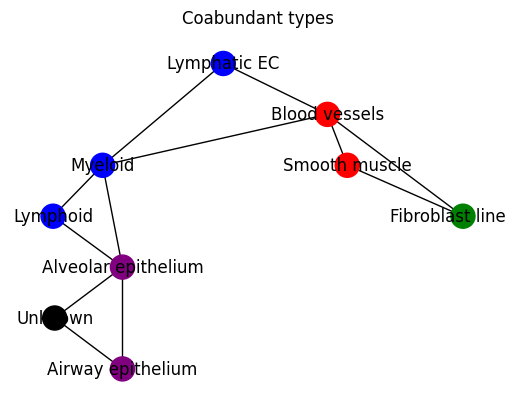

In [375]:
plt.title('Coabundant types')
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, node_color=[G.nodes[node]['color'] for node in G.nodes()])
plt.savefig('coabundant_types2.png')

Maybe we can do also mututal information of samples and see if clusters correlate with cancer or tissue type

## Compare correlation measures

Reorder the edge list to have lexicographic order in the pairs to be ale to substract the edges. And see which edges are new.

In [98]:
mi_edges = list(G_MI.edges)
mi_edges_order = [(b, a) if a < b else (a, b) for a, b in mi_edges]

spear_edges = list(G_spear.edges)
spear_edges_order = [(b, a) if a < b else (a, b) for a, b in spear_edges]

pear_edges = list(G_pear.edges)
pear_edges_order = [(b, a) if a < b else (a, b) for a, b in pear_edges]

In [100]:
set(spear_edges_order) - set(mi_edges_order)

{('Alveolar epithelium_Tumor', 'Airway epithelium_Tumor'),
 ('Blood vessels_Normal', 'Airway epithelium_Normal'),
 ('Blood vessels_Tumor', 'Airway epithelium_Tumor'),
 ('Lymphatic EC_Normal', 'Alveolar epithelium_Normal'),
 ('Lymphatic EC_Normal', 'Fibroblast lineage_Normal'),
 ('Lymphoid_Tumor', 'Blood vessels_Tumor'),
 ('Myeloid_Normal', 'Fibroblast lineage_Normal'),
 ('Myeloid_Tumor', 'Lymphoid_Normal'),
 ('Smooth muscle_Normal', 'Lymphatic EC_Normal'),
 ('Smooth muscle_Normal', 'Myeloid_Normal'),
 ('Unknown_Normal', 'Fibroblast lineage_Normal')}

TODO: We do a scatterplot of the differing edges.

## Functional Enrichment

To do a functional enrichment of the nodes in the network we can use the enrichment score from a GSEA run, on different hallmarks. For example the cancer Hallmarks.
To do this we can use the **NES**'s (normalized enrichment scores) for every study. 

This score is divided by the mean **ES** that would arise from all permutations of the gene set in question,
so as to be comparable with other gene sets. If it is $>1$ it is overexpressed, and if it is $<-1$ it is downregulated.

Due to the normalization we can do a mean of the **NES** in different studies to express a central notion of how expressed a gene set is.
We would also have to mind the FDR adjusted p-value to actually be on te sure side.

Let's procceed to massage the heatmap tables for our purposes.

In [94]:
heatmap_dir = 'nb_tumorUMAP/gseapy_gsea'

# dsets = pd.read_csv('metadata/dsets.csv')
# dsets = dsets[lambda x: x['id'] != 'Zilionis_Klein_2019_NSCLC']
heatmaps = None
# for i, id_ in enumerate(dsets.id):
for i, region in enumerate(['tumorall', 'normalall']):
    # heatmap_path = f'{heatmap_dir}/heatmap_{id_}.csv'
    heatmap_path = f'{heatmap_dir}/heatmap_{region}_{time}.csv'
    heatmap = pd.read_csv(heatmap_path)
    heatmap['id'] = region
    heatmaps = pd.concat([heatmaps, heatmap]) if i != 0 else heatmap
# Pull the id column to the front
temp_cols=heatmaps.columns.tolist()
new_cols=temp_cols[-1:] + temp_cols[:-1]
heatmaps=heatmaps[new_cols]

# Function to extract and concatenate the 2nd and 4th elements after splitting
def concat_elements(s):
    parts = s.split('_')
    # Concatenate 2nd and 4th elements if they exist
    return parts[0] + '_' + parts[2] if len(parts) > 2 else None

# heatmaps['cell_type'] = heatmaps['cell_type'].apply(concat_elements)

heatmaps

,id,cell_type,ADIPOGENESIS,ALLOGRAFT_REJECTION,ANDROGEN_RESPONSE,ANGIOGENESIS,APICAL_JUNCTION,APICAL_SURFACE,APOPTOSIS,BILE_ACID_METABOLISM,...,PROTEIN_SECRETION,REACTIVE_OXYGEN_SPECIES_PATHWAY,SPERMATOGENESIS,TGF_BETA_SIGNALING,TNFA_SIGNALING_VIA_NFKB,UNFOLDED_PROTEIN_RESPONSE,UV_RESPONSE_DN,UV_RESPONSE_UP,WNT_BETA_CATENIN_SIGNALING,XENOBIOTIC_METABOLISM
0,tumorall,Tumor cells LUAD,1.356836,-1.000000,1.376091,0.850800,0.973142,0.967165,1.040454,0.997289,...,1.603359,1.422157,1.019694,0.894255,-1.000000,1.430263,1.089830,0.995541,0.728073,1.358740
1,tumorall,Tumor cells LUAD EMT,0.957143,-1.640643,-1.279432,1.310046,-1.116832,-0.778885,-1.324846,-1.250415,...,-1.012053,1.526353,0.615640,-1.333993,-1.685676,-0.996283,1.025464,-1.495956,1.039227,1.161503
2,tumorall,Tumor cells LUAD MSLN,1.188938,0.721525,1.202478,1.239899,1.126120,1.104977,1.078588,1.004366,...,1.372176,1.081503,0.847352,1.072434,0.937430,1.235357,1.111768,1.138876,0.888053,1.166874
3,tumorall,Tumor cells LUAD NE,1.117111,-1.000000,1.047862,0.689151,0.929625,1.039501,0.862004,1.015888,...,1.302604,1.106867,1.110391,0.888185,0.674072,1.305545,0.968498,1.033200,0.985718,1.102260
4,tumorall,Tumor cells LUAD mitotic,1.216347,-1.000000,1.113449,-1.261041,0.971371,0.930256,1.082270,0.879973,...,1.424132,1.244707,1.234305,0.797570,-1.000000,1.219959,1.044644,0.996914,0.806849,1.173633
5,tumorall,Tumor cells LUSC,1.363253,-2.197865,-1.016711,-0.994095,0.897729,1.220195,-1.104247,0.816556,...,1.321270,1.621944,1.375717,-1.414357,-1.786825,1.044873,-1.063537,1.042138,0.757620,1.502100
6,tumorall,Tumor cells LUSC mitotic,1.275534,-1.000000,0.947915,-1.084308,0.750240,1.021741,0.825263,0.928609,...,1.299281,1.486768,1.501166,-1.161795,-1.000000,1.264487,-1.105797,1.054291,0.867373,1.289260
7,tumorall,Tumor cells NSCLC mixed,-1.219828,-2.077132,1.184501,-1.336197,1.130794,1.160499,-1.019960,-0.879415,...,1.097894,-1.226967,-0.817442,-1.117433,-1.178904,-1.182383,-0.888337,-1.159000,-1.120122,-0.975981
0,normalall,Alveolar cell type 1,1.235584,-2.029753,1.361433,-1.161313,1.469697,-0.983653,1.269729,1.445419,...,1.304153,0.949600,-1.120374,0.926082,-1.584131,-1.677025,1.745756,-1.079838,-0.706485,1.249045
1,normalall,Alveolar cell type 2,1.417773,-2.142538,1.430155,-1.715064,-1.310817,-1.065326,-1.178412,1.504564,...,1.253154,0.902044,0.686715,-1.029550,-1.427512,-1.093942,1.341786,1.268442,-0.875006,1.532385


Aggregate the means

In [95]:
heatmaps = heatmaps.drop(columns=['id']).groupby('cell_type').mean()

Convert all entries with in interval [-1, 1] to `0`. And SUBSTRACT the 1, to only work with actually over and underexpressed values.

In [96]:
start_ind = 1
filterer = (heatmaps.iloc[:, start_ind:] <= 1) & (heatmaps.iloc[:, start_ind:] >= -1)

# Convert the DataFrame to a numpy array for the assignment
heatmaps_array = heatmaps.to_numpy()

# Apply the mask to the relevant portion of the DataFrame's numpy array
# Note: np.nan is used here assuming numerical data; replace with None if applicable
heatmaps_array[:, start_ind:][filterer] = 0

# Substract 1 from valid values
filterer = heatmaps_array[:, start_ind:] > 1
heatmaps_array[:, start_ind:][filterer] -= 1

filterer = heatmaps_array[:, start_ind:] < -1
heatmaps_array[:, start_ind:][filterer] += 1

# Assign the modified array back to the DataFrame
heatmaps.iloc[:, :] = heatmaps_array
del heatmaps_array
heatmaps

,ADIPOGENESIS,ALLOGRAFT_REJECTION,ANDROGEN_RESPONSE,ANGIOGENESIS,APICAL_JUNCTION,APICAL_SURFACE,APOPTOSIS,BILE_ACID_METABOLISM,CHOLESTEROL_HOMEOSTASIS,COAGULATION,...,PROTEIN_SECRETION,REACTIVE_OXYGEN_SPECIES_PATHWAY,SPERMATOGENESIS,TGF_BETA_SIGNALING,TNFA_SIGNALING_VIA_NFKB,UNFOLDED_PROTEIN_RESPONSE,UV_RESPONSE_DN,UV_RESPONSE_UP,WNT_BETA_CATENIN_SIGNALING,XENOBIOTIC_METABOLISM
cell_type,,,,,,,,,,,,,,,,,,,,,
Alveolar cell type 1,1.235584,-1.029753,0.361433,-0.161313,0.469697,0.000000,0.269729,0.445419,0.433412,0.198632,...,0.304153,0.000000,-0.120374,0.000000,-0.584131,-0.677025,0.745756,-0.079838,0.000000,0.249045
Alveolar cell type 2,1.417773,-1.142538,0.430155,-0.715064,-0.310817,-0.065326,-0.178412,0.504564,0.554833,0.431011,...,0.253154,0.000000,0.000000,-0.029550,-0.427512,-0.093942,0.341786,0.268442,0.000000,0.532385
B cell,-1.521900,0.701845,-0.429211,-0.551814,-0.428615,-0.141436,-0.534637,-0.178669,-0.612153,-0.770702,...,-0.660231,-0.487775,-0.133778,-0.116219,-0.097845,-0.150393,-0.421001,-0.340281,0.000000,-0.566785
B cell dividing,1.043578,0.201214,0.000000,-1.114874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.198139,0.000000,0.000000,0.198777,0.000000,0.090316,0.000000,0.000000
Ciliated,0.875392,0.000000,0.000000,-0.637611,-0.577312,-0.327054,0.000000,0.411870,0.000000,0.000000,...,0.000000,0.006701,0.501051,-0.308268,0.000000,-0.439539,0.005252,-0.131444,0.000000,0.000000
Club,-1.315323,-0.791972,0.000000,-0.387317,-0.271581,0.000000,-0.132105,0.000000,0.100144,0.000000,...,-0.139530,-0.367488,0.000000,-0.418979,-0.230213,-0.354339,0.000000,-0.365234,-0.121207,0.000000
DC mature,-1.049049,0.784535,-0.202579,-0.845291,0.189273,0.000000,0.439760,-0.681758,0.115625,-0.308999,...,-0.543367,0.012834,-0.387066,0.000000,1.491451,-0.333932,-0.180582,0.454213,0.000000,0.013807
Endothelial cell arterial,1.399482,0.000000,0.281879,0.456630,0.371645,0.272958,0.292300,0.000000,0.188972,0.665459,...,0.158837,0.478976,0.000000,0.708713,0.068150,0.000000,0.444002,0.027498,0.381221,0.139298
Endothelial cell capillary,1.250009,-0.175847,0.116744,0.837435,0.991652,0.139829,0.456344,-0.343505,-0.200471,1.264885,...,-0.054943,-0.566128,0.000000,0.696865,-0.419083,-1.054086,0.710006,-0.238801,0.538981,-0.136306


Build the pie chart dict with the four most under and overexpressed functions for every type

In [97]:
from itertools import islice

node_pie_over = {}
node_pie_under = {}

for type in heatmaps.index:
    dicter = heatmaps.loc[type, :].to_dict()
    
    sorted_dict = dict(sorted(dicter.items(), key=lambda item: item[1], reverse=True))
    sorted_dict = dict(islice(sorted_dict.items(), 4))
    
    # Only keep the functions that are not 0
    sorted_dict = {key:value for key, value in sorted_dict.items() if value != 0}

    if not sorted_dict:
        sorted_dict["NO OVEREXPRESSION"] = 1

    sorted_dict_under = dict(sorted(dicter.items(), key=lambda item: item[1], reverse=False))
    sorted_dict_under = dict(islice(sorted_dict_under.items(), 4))

    # Only keep the functions that are not 0
    sorted_dict_under = {key:value for key, value in sorted_dict_under.items() if value != 0}

    if not sorted_dict_under:
        sorted_dict_under["NO UNDEREXPRESSION"] = 1
        
    node_pie_over[type] = sorted_dict
    node_pie_under[type] = sorted_dict_under

node_pie_under

{'Alveolar cell type 1': {'MYC_TARGETS_V1': -1.450641815183356,
  'E2F_TARGETS': -1.2602900199798368,
  'G2M_CHECKPOINT': -1.178462540005245,
  'ALLOGRAFT_REJECTION': -1.0297530410878357},
 'Alveolar cell type 2': {'ALLOGRAFT_REJECTION': -1.142537889576793,
  'MYC_TARGETS_V1': -1.1067805190746118,
  'E2F_TARGETS': -0.972665273855879,
  'G2M_CHECKPOINT': -0.8488263108961636},
 'B cell': {'ADIPOGENESIS': -1.5219003452211446,
  'OXIDATIVE_PHOSPHORYLATION': -0.9482244358037759,
  'COAGULATION': -0.7707017749756675,
  'EPITHELIAL_MESENCHYMAL_TRANSITION': -0.7067527557487938},
 'B cell dividing': {'ANGIOGENESIS': -1.114873748060464,
  'HEDGEHOG_SIGNALING': -0.6098450439620444},
 'Ciliated': {'EPITHELIAL_MESENCHYMAL_TRANSITION': -0.8909375178570031,
  'IL6_JAK_STAT3_SIGNALING': -0.6595995409600643,
  'ANGIOGENESIS': -0.6376109683644631,
  'APICAL_JUNCTION': -0.577311826837511},
 'Club': {'ADIPOGENESIS': -1.3153233116913858,
  'MYC_TARGETS_V1': -0.8184775560183053,
  'ALLOGRAFT_REJECTION': -0.

Get the counts for cells for every type:

In [165]:
groups = pd.read_csv(f'metadata/groups{time}.csv')
groups = groups.set_index([cell_type_key, 'sample'])
num_cells = groups.groupby(cell_type_key).sum().to_dict()['0']

# num_cells = {key: np.log2(val) for key, val in num_cells.items()}
num_cells

{'Alveolar cell type 1': 278,
 'Alveolar cell type 2': 2155,
 'B cell': 14858,
 'B cell dividing': 80,
 'Ciliated': 1416,
 'Club': 280,
 'DC mature': 519,
 'Endothelial cell arterial': 142,
 'Endothelial cell capillary': 340,
 'Endothelial cell lymphatic': 191,
 'Endothelial cell venous': 1735,
 'Fibroblast adventitial': 333,
 'Fibroblast alveolar': 1024,
 'Fibroblast peribronchial': 1254,
 'Macrophage': 26859,
 'Macrophage alveolar': 12569,
 'Mast cell': 4710,
 'Mesothelial': 29,
 'Monocyte classical': 6132,
 'Monocyte non-classical': 576,
 'NK cell': 6400,
 'NK cell dividing': 146,
 'Neutrophils': 9518,
 'Pericyte': 312,
 'Plasma cell': 9849,
 'Plasma cell dividing': 213,
 'ROS1+ healthy epithelial': 15,
 'Smooth muscle cell': 310,
 'T cell CD4': 40540,
 'T cell CD4 dividing': 984,
 'T cell CD8 activated': 3108,
 'T cell CD8 dividing': 1117,
 'T cell CD8 effector memory': 16002,
 'T cell CD8 naive': 2720,
 'T cell CD8 terminally exhausted': 8314,
 'T cell NK-like': 3213,
 'T cell reg

In [170]:
adata.obs.study.value_counts()

AAACCTGAGAGGTAGA-1_1-1    Chen_Zhang_2020
AAACCTGAGATCCTGT-1_1-1    Chen_Zhang_2020
AAACCTGAGGAGCGAG-1_1-1    Chen_Zhang_2020
AAACCTGAGGCCATAG-1_1-1    Chen_Zhang_2020
AAACCTGAGGTTCCTA-1_1-1    Chen_Zhang_2020
                               ...       
811511_27-3                        UKIM-V
468397_27-3                        UKIM-V
115884_27-3                        UKIM-V
201201_27-3                        UKIM-V
194204_27-3                        UKIM-V
Name: study, Length: 228084, dtype: category
Categories (8, object): ['Chen_Zhang_2020', 'He_Fan_2021', 'Kim_Lee_2020', 'Lambrechts_Thienpont_2018', 'Laughney_Massague_2020', 'Maynard_Bivona_2020', 'UKIM-V', 'Zilionis_Klein_2019']

Check the distribution of cells per type

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'Alveolar cell type 1'),
  Text(1, 0, 'Alveolar cell type 2'),
  Text(2, 0, 'B cell'),
  Text(3, 0, 'B cell dividing'),
  Text(4, 0, 'Ciliated'),
  Text(5, 0, 'Club'),
  Text(6, 0, 'DC mature'),
  Text(7, 0, 'Endothelial cell arterial'),
  Text(8, 0, 'Endothelial cell capillary'),
  Text(9, 0, 'Endothelial cell lymphatic'),
  Text(10, 0, 'Endothelial cell venous'),
  Text(11, 0, 'Fibroblast adventitial'),
  Text(12, 0, 'Fibroblast alveolar'),
  Text(13, 0, 'Fibroblast peribronchial'),
  Text(14, 0, 'Macrophage'),
  Text(15, 0, 'Macrophage alveolar'),
  Text(16, 0, 'Mast cell'),
  Text(17, 0, 'Mesothelial'),
  Text(18, 0, 'Monocyte classical'),
  Text(19, 0, 'Monocyte non-classical'

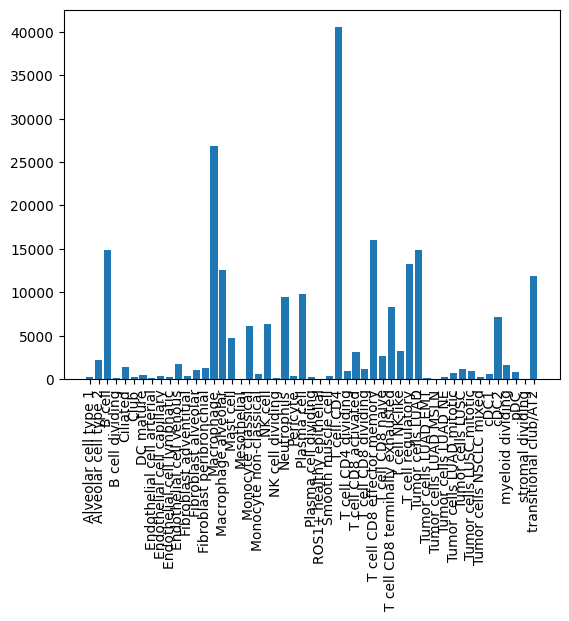

In [166]:
plt.bar(num_cells.keys(), height=num_cells.values())
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'Alveolar cell type 1'),
  Text(1, 0, 'Alveolar cell type 2'),
  Text(2, 0, 'B cell'),
  Text(3, 0, 'B cell dividing'),
  Text(4, 0, 'Ciliated'),
  Text(5, 0, 'Club'),
  Text(6, 0, 'DC mature'),
  Text(7, 0, 'Endothelial cell arterial'),
  Text(8, 0, 'Endothelial cell capillary'),
  Text(9, 0, 'Endothelial cell lymphatic'),
  Text(10, 0, 'Endothelial cell venous'),
  Text(11, 0, 'Fibroblast adventitial'),
  Text(12, 0, 'Fibroblast alveolar'),
  Text(13, 0, 'Fibroblast peribronchial'),
  Text(14, 0, 'Macrophage'),
  Text(15, 0, 'Macrophage alveolar'),
  Text(16, 0, 'Mast cell'),
  Text(17, 0, 'Mesothelial'),
  Text(18, 0, 'Monocyte classical'),
  Text(19, 0, 'Monocyte non-classical'

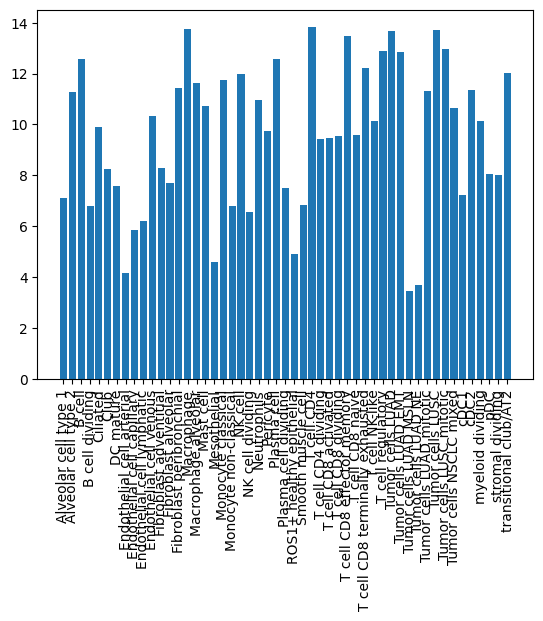

In [102]:
plt.bar(num_cells.keys(), height=num_cells.values())
plt.xticks(rotation=90)

#### Overexpressed

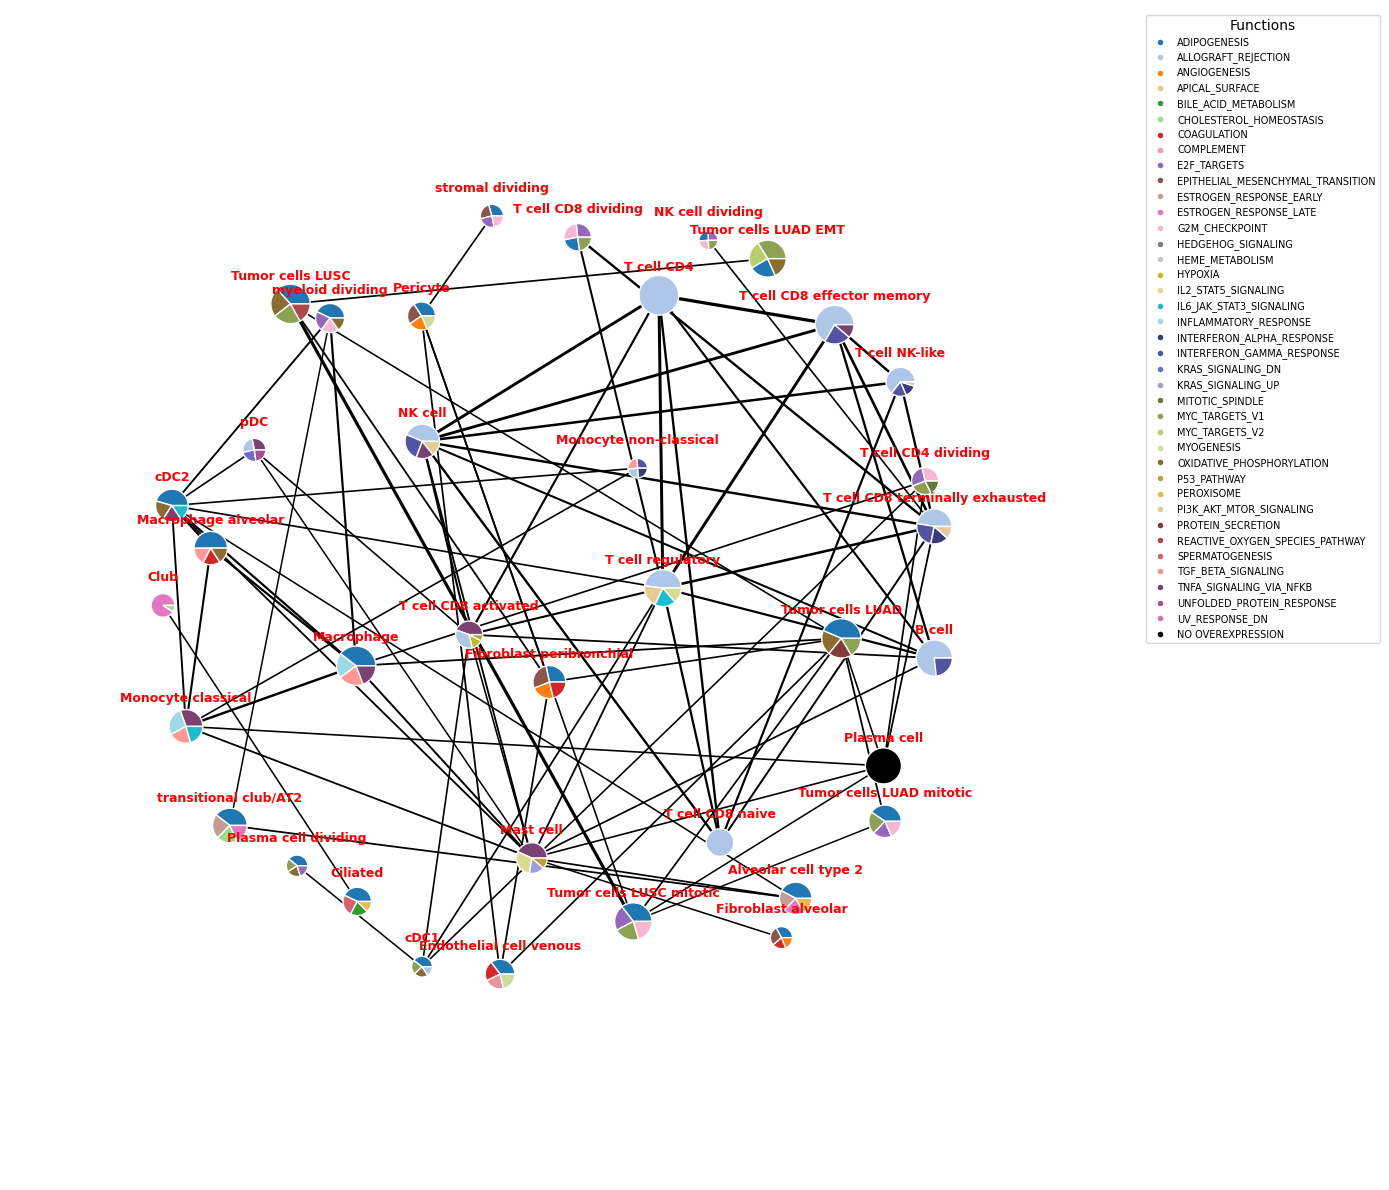

In [107]:
fig, ax = ut.functional_network_plot(G, node_pie_over, num_cells=num_cells,
                                     figsize=(14, 12), spring_force=2, scale=1,
                                     max_radius=0.05, max_width=3, label_fontsize=9,
                                     show=False)
# fig = plt.gcf()
plt.tight_layout()
fig.savefig(f'{aracne_dir}/over_{id_}_{time}.png')
# plt.show()


#### Underexpressed

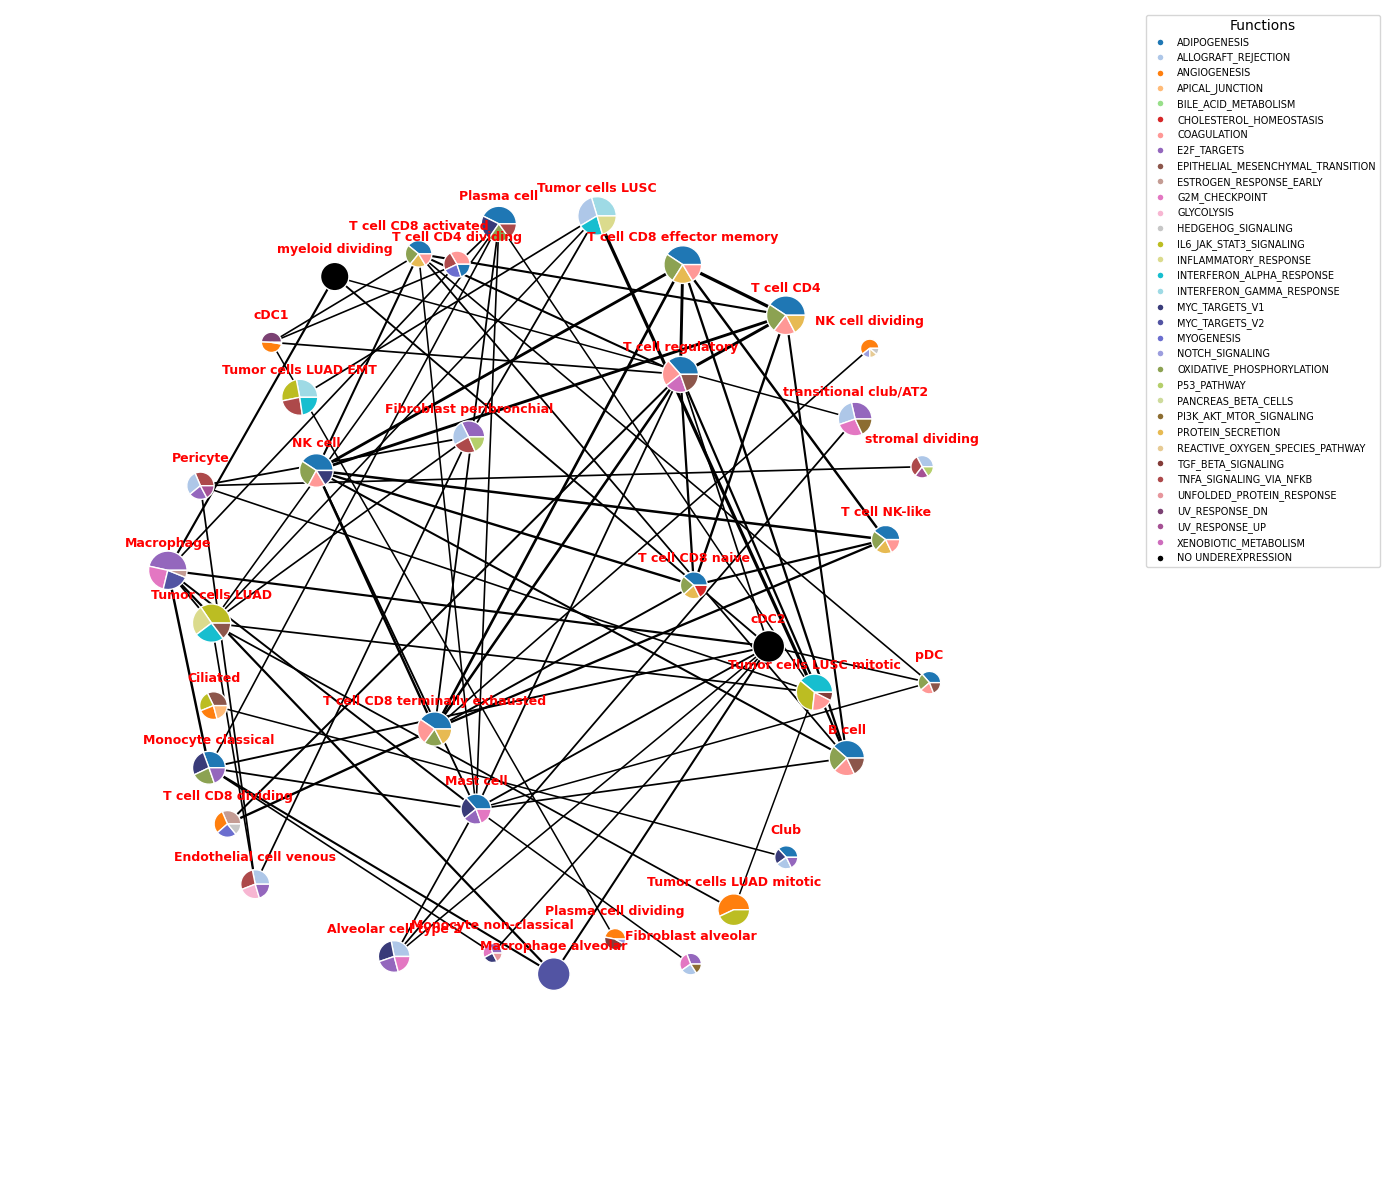

In [108]:
ut.functional_network_plot(G, node_pie_under, num_cells=num_cells,
                             figsize=(14, 12), spring_force=2, scale=1,
                             max_radius=0.05, max_width=3, label_fontsize=9,
                             show=False)
plt.tight_layout()
fig.savefig(f'{aracne_dir}/under_{id_}_{time}.png')

## MI with sklearn (deprecated)

In [84]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score

We won't use the function `mutual_info_score` because it is for labels assigned to a same observation. Which is not the case 
here because we are counting ocurrence of cells and no two cells should have more than one type.

So we use the `mutual_info_classif` though it is pretty unstable and does not use the same method than ARACNE.

**TODO:** compare the two methods, apparently n_neighbours is better at handling missing values?!?!?

To use discrete values we will rank the cell type in every sample based on a normalization by its total number of cells.

In [174]:
cells_x_sample = samp_type.transpose().sum().to_numpy()
percents = (samp_type / cells_x_sample.reshape(-1,1))*10
percents = percents.astype(int)
percents

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
sample,,,,,,,,,,
1247_Lambrechts,0,2,0,0,0,3,0,3,0,0
BRONCHO_11_Kim,0,0,0,0,0,7,0,2,0,0
BRONCHO_58_Kim,0,1,0,0,0,6,0,1,0,0
BT1249_Lambrechts,1,0,0,3,0,2,0,2,0,0
BT1A_Lambrechts,1,0,0,0,0,5,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
patient_45_tumor_primary_Goveia,0,0,4,0,0,0,0,0,0,2
patient_46_normal_adjacent_Goveia,0,0,1,0,0,0,0,6,0,0
patient_46_tumor_primary_Goveia,1,1,2,0,0,0,0,0,0,2


Lets try with 10 ranks first. We should maybe look at the histogram to define the ranks but later.

In [167]:
percents.quantile([0.25,0.5,0.75])

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
0.25,0.555112,0.095459,0.080835,0.090000,0.000000,12.106691,0.0,12.803444,0.000000,1.073977
0.50,2.155407,1.019274,0.441795,0.530837,0.000000,35.717875,0.0,25.158388,0.049634,3.158462
0.75,11.011905,4.148505,1.565885,2.462523,0.107153,60.486871,0.0,44.321183,0.238419,9.326886


In [180]:
mis = []

for col in percents.columns:
    
    mis.append(mutual_info_classif(percents.to_numpy(),percents[col].to_numpy().reshape(-1,1)))
    
pd.DataFrame(mis, columns=percents.columns, index = percents.columns)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Level_2_transfered_label,Airway epithelium,Alveolar epithelium,Blood vessels,Fibroblast lineage,Lymphatic EC,Lymphoid,Mesothelium,Myeloid,Smooth muscle,Unknown
Level_2_transfered_label,,,,,,,,,,
Airway epithelium,1.054760e+00,5.498831e-01,3.326694e-01,4.077500e-01,1.264831e-01,1.390151e-01,4.939621e-01,4.922736e-02,4.321303e-01,0.000000e+00
Alveolar epithelium,0.000000e+00,6.438520e-01,2.373198e-01,2.415227e-01,4.240108e-02,6.390419e-02,3.454416e-01,7.780823e-02,2.860061e-01,2.874398e-02
Blood vessels,1.268936e-02,2.330745e-01,3.365842e-01,3.073920e-01,2.537583e-01,2.804300e-02,2.768843e-01,0.000000e+00,3.217768e-01,0.000000e+00
Fibroblast lineage,2.326619e-03,5.747926e-02,1.472116e-01,3.696483e-01,1.481677e-01,2.477861e-03,2.179479e-01,1.900580e-03,2.129614e-01,1.731524e-02
Lymphatic EC,0.000000e+00,0.000000e+00,8.131330e-03,0.000000e+00,4.811499e-02,0.000000e+00,3.892864e-02,0.000000e+00,4.155331e-02,2.374098e-03
Lymphoid,1.483189e-01,9.485741e-02,6.735740e-02,0.000000e+00,1.098557e-01,1.333505e+00,6.050899e-02,4.374144e-01,3.717078e-02,1.221909e-01
Mesothelium,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
Myeloid,1.562561e-02,2.437624e-01,2.578793e-02,1.247594e-01,9.637084e-02,3.219901e-01,0.000000e+00,1.492556e+00,8.698299e-02,1.098791e-01
Smooth muscle,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16


tener las unidades en bits te sirve para comparar que tantos bits pueden compartir dos cosas

This binning is not as efficient as the one from ARACNE because the Gaussina copula method considers variance also, besides the static width. So we will use the method from ARACNE and in that way, we also wont have to normalize for ourselves.